In [137]:
!pip3 install pandas numpy matplotlib

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [212]:
import numpy as np 
import pandas as pd

from datetime import date, timedelta

from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

import os

In [272]:
from datetime import datetime, timedelta

first_day = date(2020,2,25)
last_day = datetime.now().date() - timedelta(days=1)

In [273]:
demographics = pd.read_csv('data/demographics_de.csv')

In [215]:
population = demographics[['state','population']].groupby('state').sum()

In [216]:
df_old = pd.read_csv('data/covid_de.csv')

# COVID-19 Analyse - Deutschland - Bundesländer
## Daten: Funke Medien (https://funkemedien.de/)

In [217]:
print("Stand: {}".format(last_day)) 

Stand: 2021-05-29


In [224]:
df = pd.read_csv('https://funkeinteraktiv.b-cdn.net/history.v4.csv',usecols=['date','label','confirmed','deaths', 'recovered','label_parent'], error_bad_lines=False)

df['timestamp'] = pd.to_datetime(df['date'], format="%Y%m%d")

df_ger = df[(df.label=='Deutschland')&(df.date>=int(first_day.strftime('%Y%m%d')))&(df.date<=int(last_day.strftime('%Y%m%d')))][
    ['label', 'timestamp', 'confirmed', 'deaths', 'recovered']]
df_states = df[(df.label_parent=='Deutschland')&(df.date>=int(first_day.strftime('%Y%m%d')))&(df.date<=int(last_day.strftime('%Y%m%d')))][
    ['label', 'timestamp', 'confirmed', 'deaths', 'recovered']]

# Plot: Akkumuliert Fallzahlen in Deutschland

In [225]:
df_ger['active'] = df_ger['confirmed'] - df_ger['recovered']

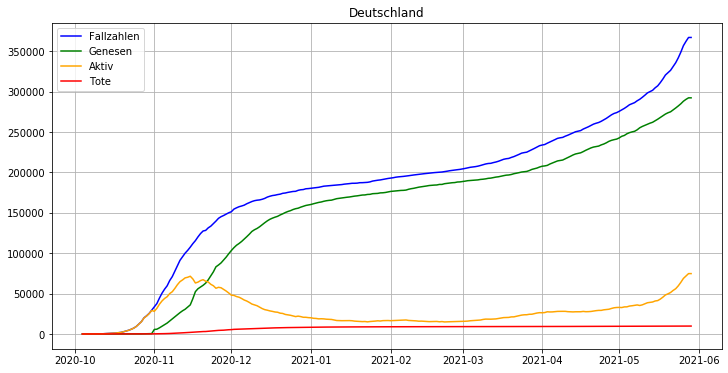

In [229]:
plt.figure(figsize=(12,6))
datelist = pd.date_range(end = last_day, periods = df_ger.shape[0]).to_pydatetime().tolist()
plt.plot(datelist, df_ger.confirmed, label='Fallzahlen', color='b')
plt.plot(datelist, df_ger.recovered, label='Genesen', color='g')
plt.plot(datelist, df_ger.active, label='Aktiv', color='orange')
plt.plot(datelist, df_ger.deaths, label='Tote', color='r')

plt.legend()
plt.title("Deutschland")
plt.grid()
plt.show()

# Plot: Akkumulierte Fallzahlen in Deutschland - 7 Tage Durchschnitt
Die COVID-19 Daten in De enthalten wöchentliche oszillationen.

Zur einfacheren Erkennung der Tendenzen, wird eine 7 Tage-Glättung vorgenommen.

In [230]:
df_ger["confirmed_ma"] = ""
df_ger["deaths_ma"] = ""
df_ger["recovered_ma"] = ""

for i in df_ger.index:
    df_ger.loc[i, "confirmed_ma"] = round(np.mean(df_ger.loc[i-6:i, "confirmed"]))
    df_ger.loc[i, "deaths_ma"] = round(np.mean(df_ger.loc[i-6:i, "deaths"]))
    df_ger.loc[i, "recovered_ma"] = round(np.mean(df_ger.loc[i-6:i, "recovered"]))
    
df_ger['active_ma'] = df_ger['confirmed_ma'] - df_ger['recovered_ma']

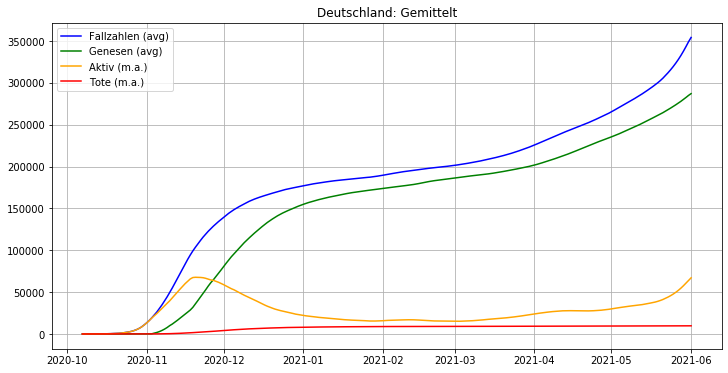

In [232]:
plt.figure(figsize=(12,6))
datelist = pd.date_range(end = date.today(), periods = df_ger.shape[0]).to_pydatetime().tolist()
plt.plot(datelist, df_ger.confirmed_ma, label='Fallzahlen (avg)', color='b')
plt.plot(datelist, df_ger.recovered_ma, label='Genesen (avg)', color='g')
plt.plot(datelist, df_ger.active_ma, label='Aktiv (m.a.)', color='orange')
plt.plot(datelist, df_ger.deaths_ma, label='Tote (m.a.)', color='r')

plt.legend()
plt.title("Deutschland: Gemittelt")
plt.grid()
plt.show()

# Plot: Tägliche Fallzahlen und Todesfälle (nicht akkumuliert!)

In [233]:
df_ger['confirmed_delta'] = df_ger['confirmed'] - np.append([0], df_ger['confirmed'].values[:-1])
df_ger['deaths_delta'] = df_ger['deaths'] - np.append([0], df_ger['deaths'].values[:-1])

In [234]:
df_ger["confirmed_delta_ma"] = ""
df_ger["deaths_delta_ma"] = ""

for i in df_ger.index:
    df_ger.loc[i, "confirmed_delta_ma"] = round(np.mean(df_ger.loc[i-6:i, "confirmed_delta"]))
    df_ger.loc[i, "deaths_delta_ma"] = round(np.mean(df_ger.loc[i-6:i, "deaths_delta"]))

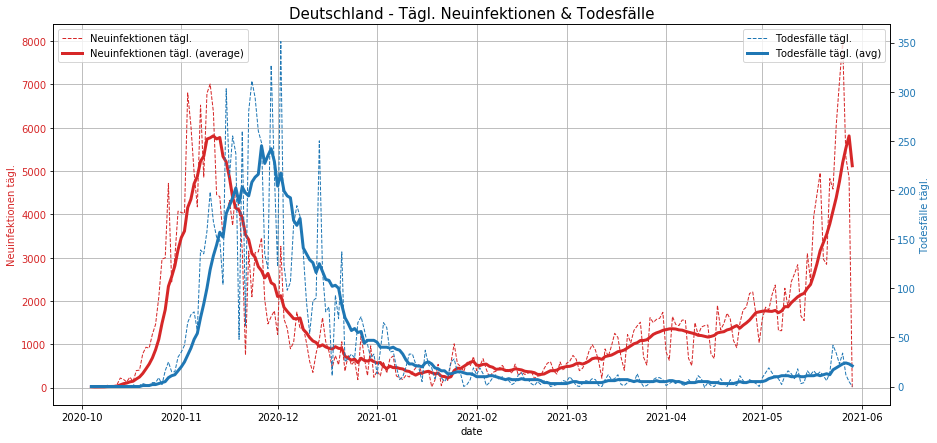

In [236]:
datelist = pd.date_range(end=last_day, periods=df_ger.shape[0]).to_pydatetime().tolist()
fig, ax1 = plt.subplots(figsize=(15,7))


color = 'tab:red'
ax1.set_xlabel('date')
ax1.set_ylabel('Neuinfektionen tägl.', color=color)
ax1.plot(datelist, df_ger.confirmed_delta, label='Neuinfektionen tägl.', ls="--", color=color, lw=1)
ax1.plot(datelist, df_ger.confirmed_delta_ma, label='Neuinfektionen tägl. (average)', color=color, lw=3)
ax1.tick_params(axis='y', labelcolor=color)

plt.legend()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Todesfälle tägl.', color=color)  # we already handled the x-label with ax1
ax2.plot(datelist, df_ger.deaths_delta, label='Todesfälle tägl.', ls="--", color=color, lw=1)
ax2.plot(datelist, df_ger.deaths_delta_ma, label='Todesfälle tägl. (avg)', color=color, lw=3)

ax2.tick_params(axis='y', labelcolor=color)


ax1.legend(loc=2)
ax2.legend(loc=1)
ax1.grid()

plt.legend()
plt.title("Deutschland - Tägl. Neuinfektionen & Todesfälle", fontsize=15)

plt.show()

# Wachstumsrate

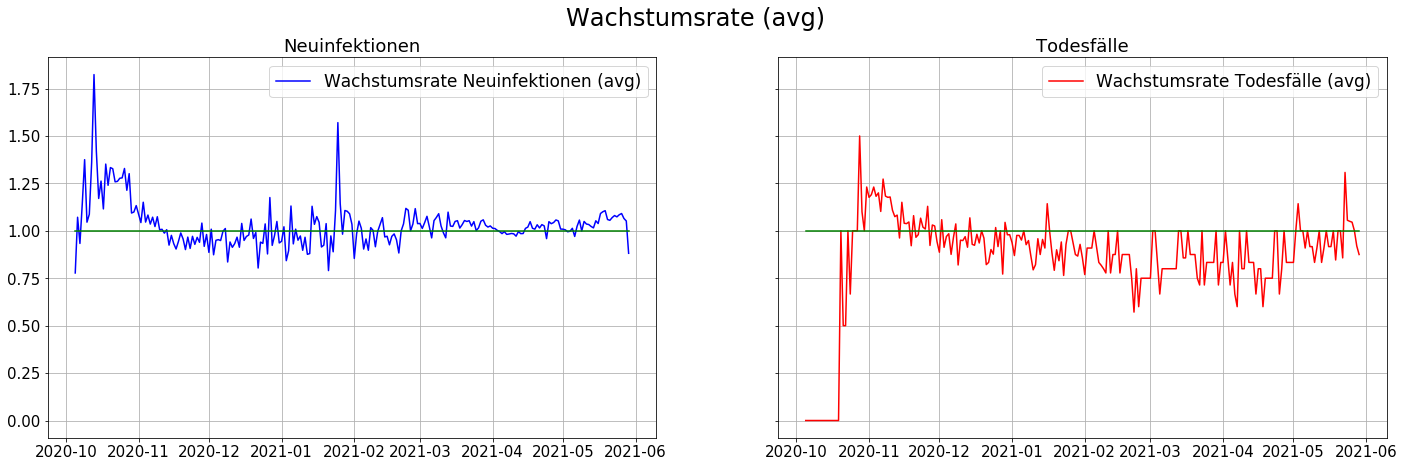

In [237]:
datelist = pd.date_range(end = last_day, periods = df_ger.shape[0]).to_pydatetime().tolist()

fig, axs = plt.subplots(1, 2, figsize=(24, 7), sharey=True)
fig.suptitle("Wachstumsrate (avg)", fontsize=24)

axs[0].plot(datelist[1:], df_ger.confirmed_delta_ma.values[1:]/df_ger.confirmed_delta_ma.values[:-1], label='Wachstumsrate Neuinfektionen (avg)', color='b')
axs[0].plot(datelist[1:], [1]*(df_ger.shape[0]-1), color='g')
axs[0].legend(fontsize=17)
axs[0].set_title("Neuinfektionen", fontsize=18)
axs[0].tick_params(axis='x', labelsize=15)
axs[0].tick_params(axis='y', labelsize=15)
axs[0].grid()


axs[1].plot(datelist[1:], df_ger.deaths_delta_ma.values[1:]/(df_ger.deaths_delta_ma.values[:-1]+1), label='Wachstumsrate Todesfälle (avg)', color='r')
axs[1].plot(datelist[1:], [1]*(df_ger.shape[0]-1), color='g')
axs[1].legend(fontsize=17)
axs[1].set_title("Todesfälle", fontsize=18)
axs[1].tick_params(axis='x', labelsize=15)
axs[1].tick_params(axis='y', labelsize=15)
axs[1].grid()

# Aktive Neuinfektionen

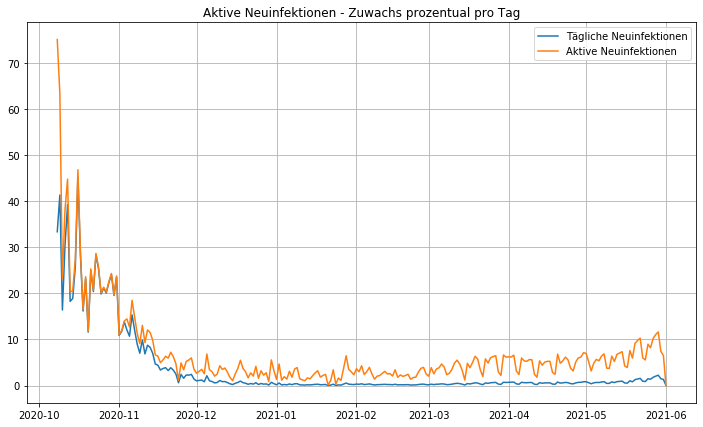

In [238]:
k=1  # won't show first k days
datelist = pd.date_range(end = date.today(), periods = df_ger.shape[0]-k).to_pydatetime().tolist()

plt.figure(figsize = (12,7))
plt.grid()
plt.plot(datelist, df_ger.confirmed_delta[k:] / df_ger.confirmed[k:] * 100, label='Tägliche Neuinfektionen')
plt.plot(datelist, df_ger.confirmed_delta[k:] / df_ger.active[k:] * 100, label='Aktive Neuinfektionen')
plt.legend()

plt.title("Aktive Neuinfektionen - Zuwachs prozentual pro Tag")
plt.show()

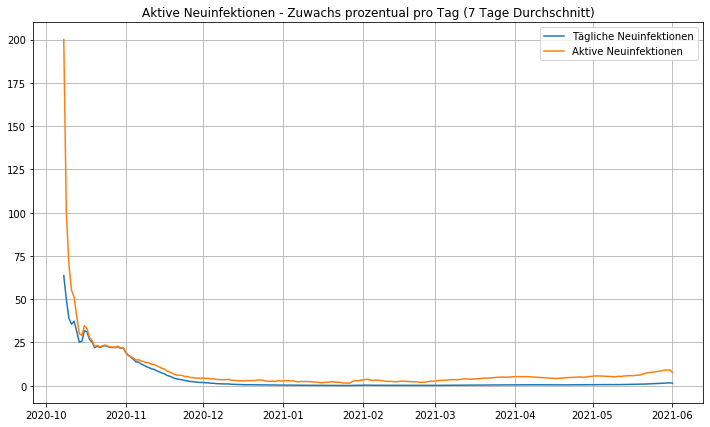

In [239]:
k=1  # won't show first k days
datelist = pd.date_range(end = date.today(), periods = df_ger.shape[0]-k).to_pydatetime().tolist()

plt.figure(figsize = (12,7))
plt.grid()
plt.plot(datelist, df_ger.confirmed_delta_ma[k:] / df_ger.confirmed_ma[k:] * 100, label='Tägliche Neuinfektionen')
plt.plot(datelist, df_ger.confirmed_delta_ma[k:] / df_ger.active_ma[k:] * 100, label='Aktive Neuinfektionen')
plt.legend()

plt.title("Aktive Neuinfektionen - Zuwachs prozentual pro Tag (7 Tage Durchschnitt)")
plt.show()

# Bundesländer

In [240]:
states = df_states.label.unique()

df_states['confirmed_delta'] = ""
df_states['deaths_delta'] = ""

for s in states:
    df_states.loc[df_states.label==s, 'confirmed_delta'] = df_states.loc[df_states.label==s, 'confirmed'] \
            - np.append([0], df_states.loc[df_states.label==s,'confirmed'].values[:-1])
    df_states.loc[df_states.label==s, 'deaths_delta'] = df_states.loc[df_states.label==s, 'deaths'] \
            - np.append([0], df_states.loc[df_states.label==s,'deaths'].values[:-1])

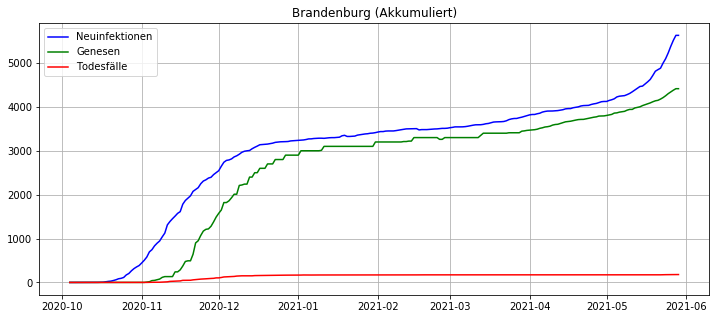

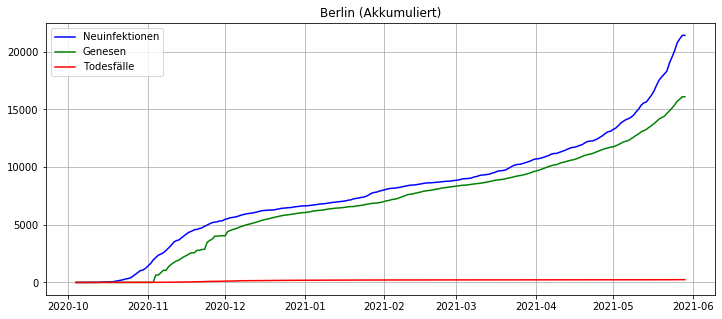

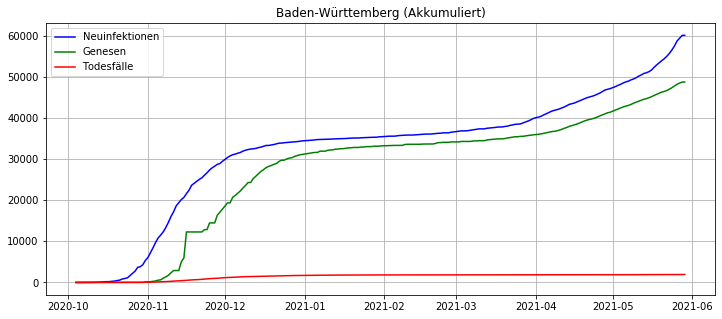

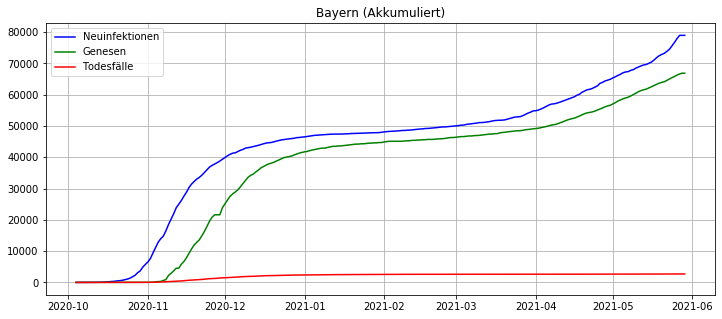

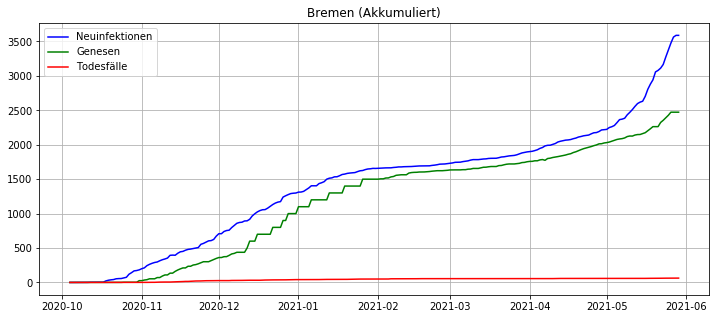

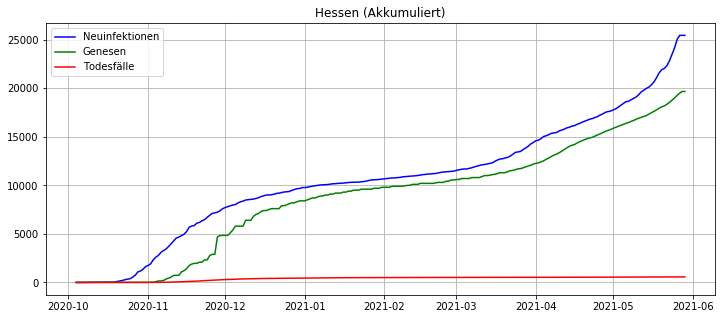

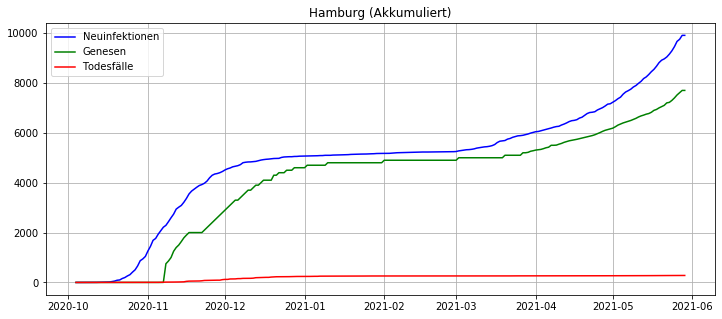

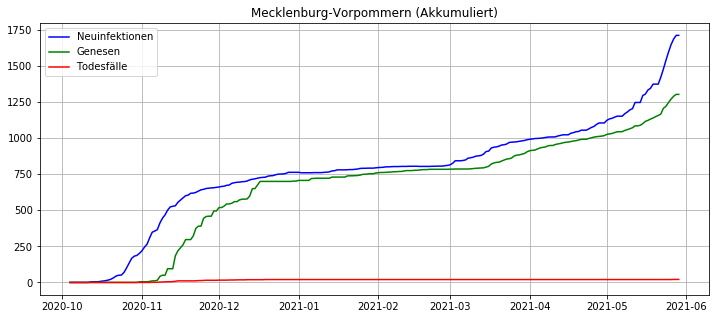

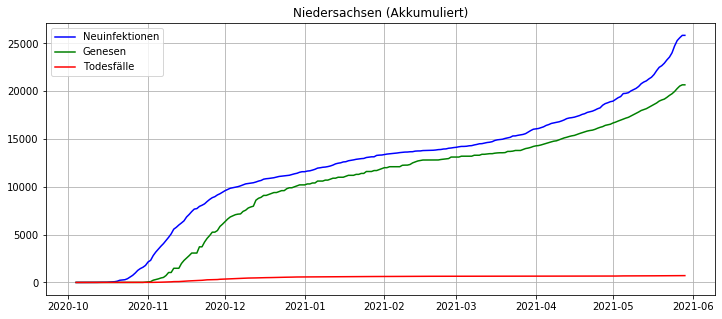

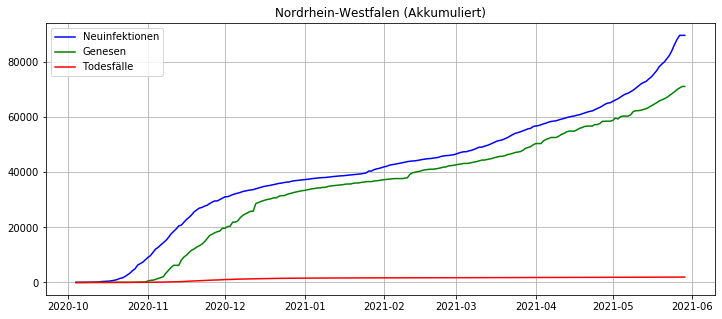

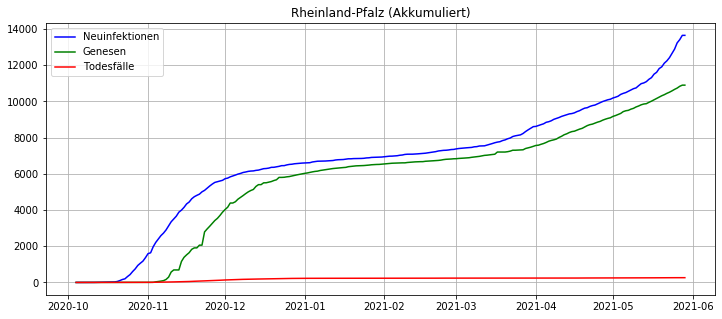

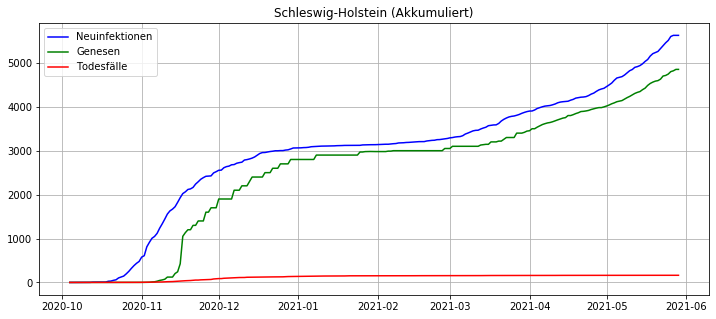

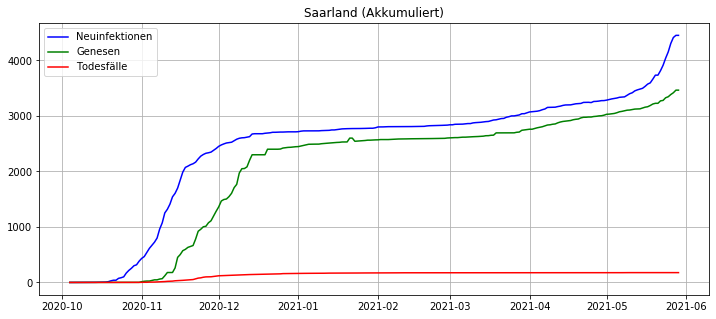

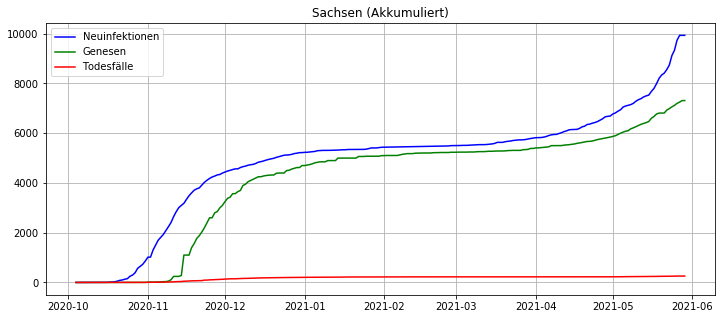

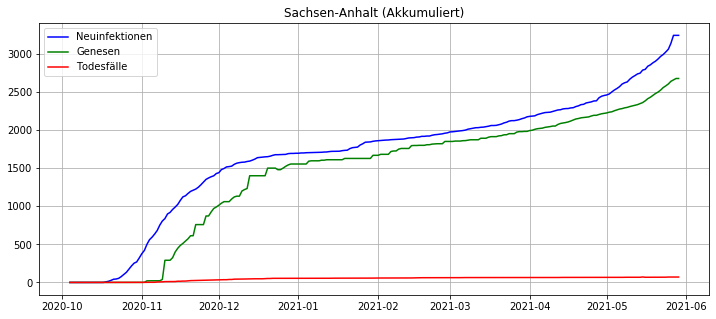

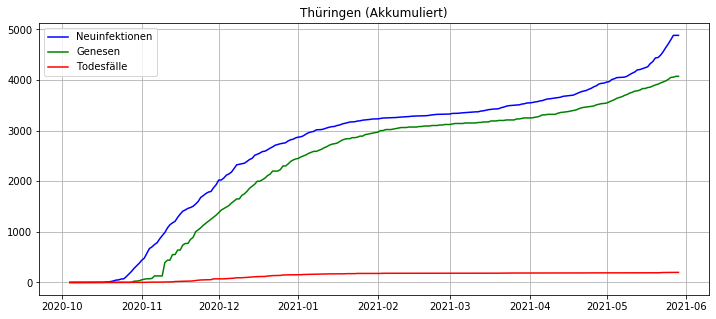

In [241]:
for s in states[:-1]:
    plt.figure(figsize=(12,5))
    datelist = pd.date_range(end = last_day, periods = df_states[df_states.label==s].shape[0]).to_pydatetime().tolist()
    plt.plot(datelist, df_states[df_states.label==s].confirmed, color='b', label='Neuinfektionen')
    plt.plot(datelist, df_states[df_states.label==s].recovered, color='g', label='Genesen')
    plt.plot(datelist, df_states[df_states.label==s].deaths, color='r', label='Todesfälle')

    plt.title(s + " (Akkumuliert)")
    plt.legend()
    plt.grid()

# Bundesländer: Neuinfektionen und Todesfälle

In [242]:
df_states["confirmed_ma"] = ""
df_states["deaths_ma"] = ""

df_states["confirmed_delta_ma"] = ""
df_states["deaths_delta_ma"] = ""

for s in states:
    for i in df_states[df_states.label==s].index:
        df_states.loc[i, "confirmed_ma"] = round(np.mean(df_states[df_states.label==s].loc[i-6:i].confirmed))
        df_states.loc[i, "deaths_ma"] = round(np.mean(df_states[df_states.label==s].loc[i-6:i].deaths))
        
        df_states.loc[i, "confirmed_delta_ma"] = round(np.mean(df_states[df_states.label==s].loc[i-6:i].confirmed_delta))
        df_states.loc[i, "deaths_delta_ma"] = round(np.mean(df_states[df_states.label==s].loc[i-6:i].deaths_delta))

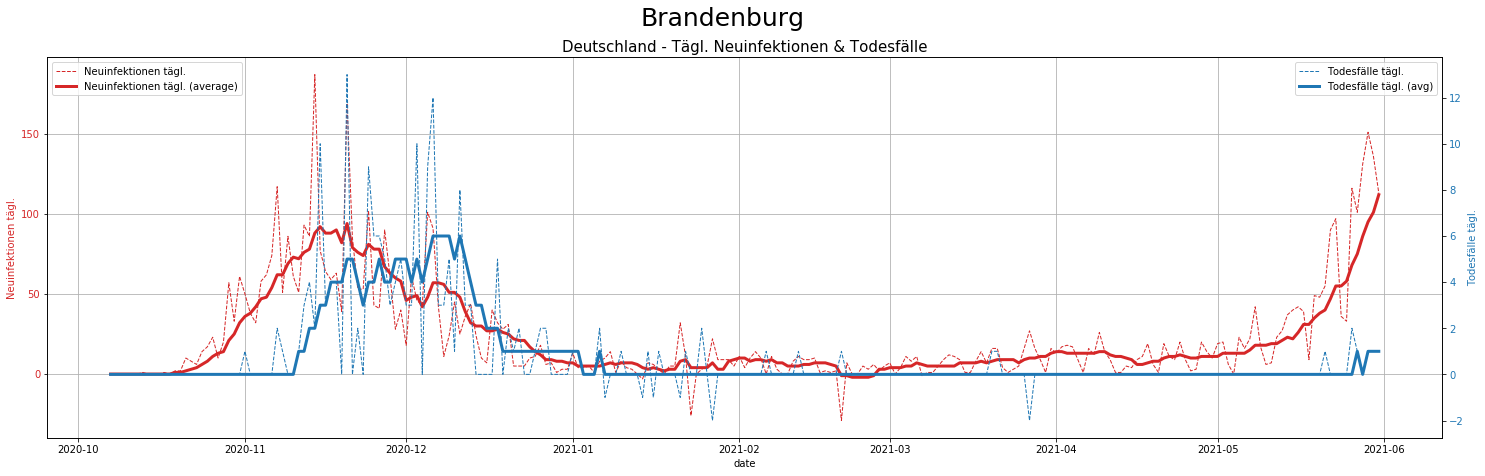

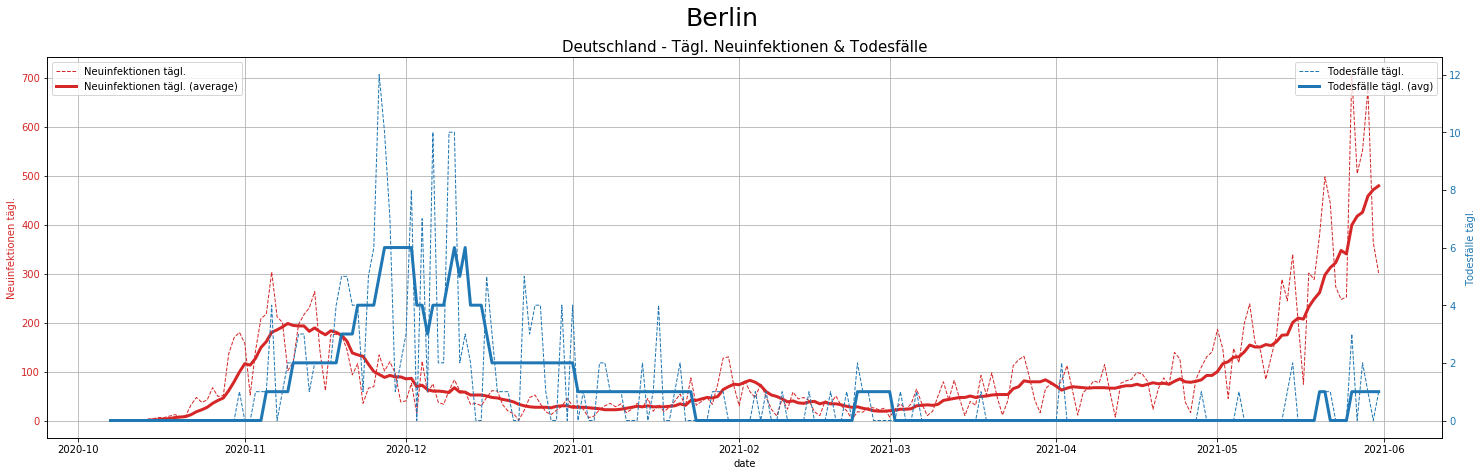

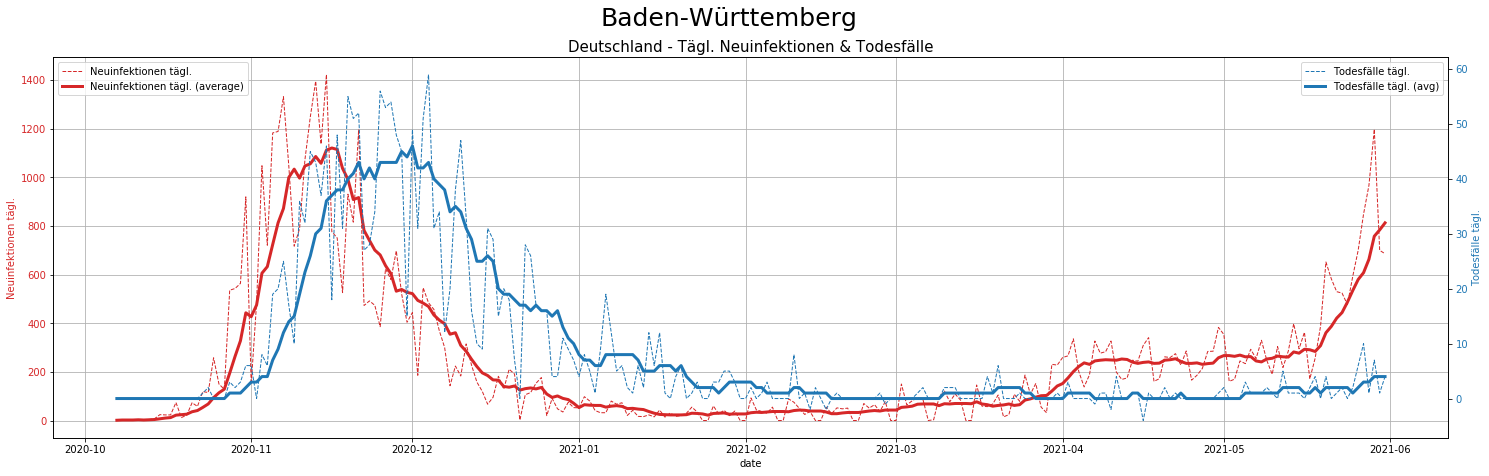

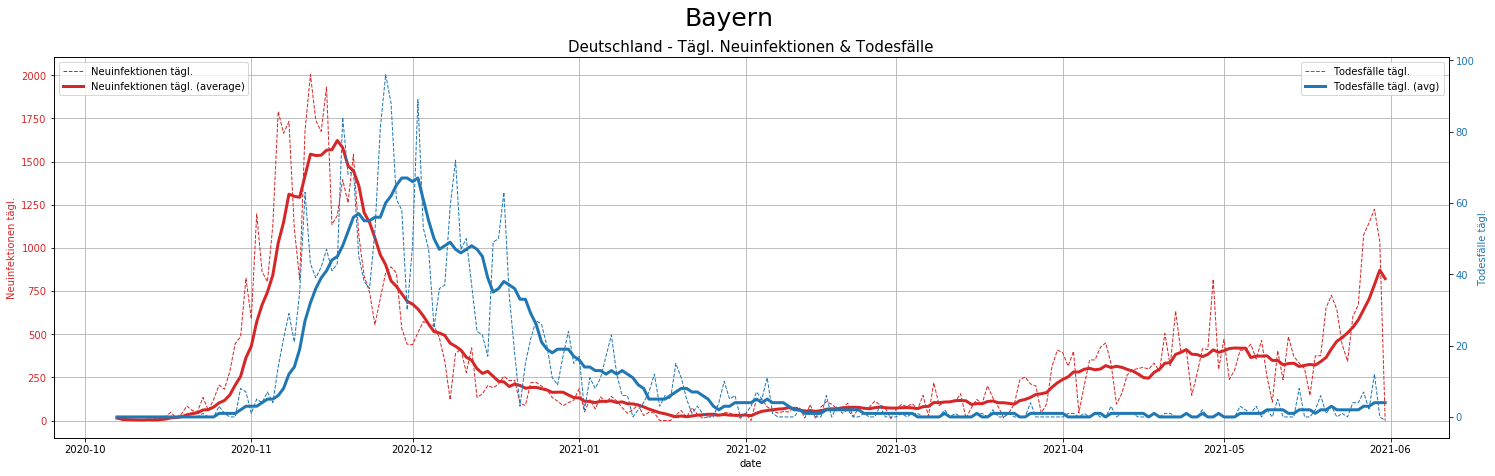

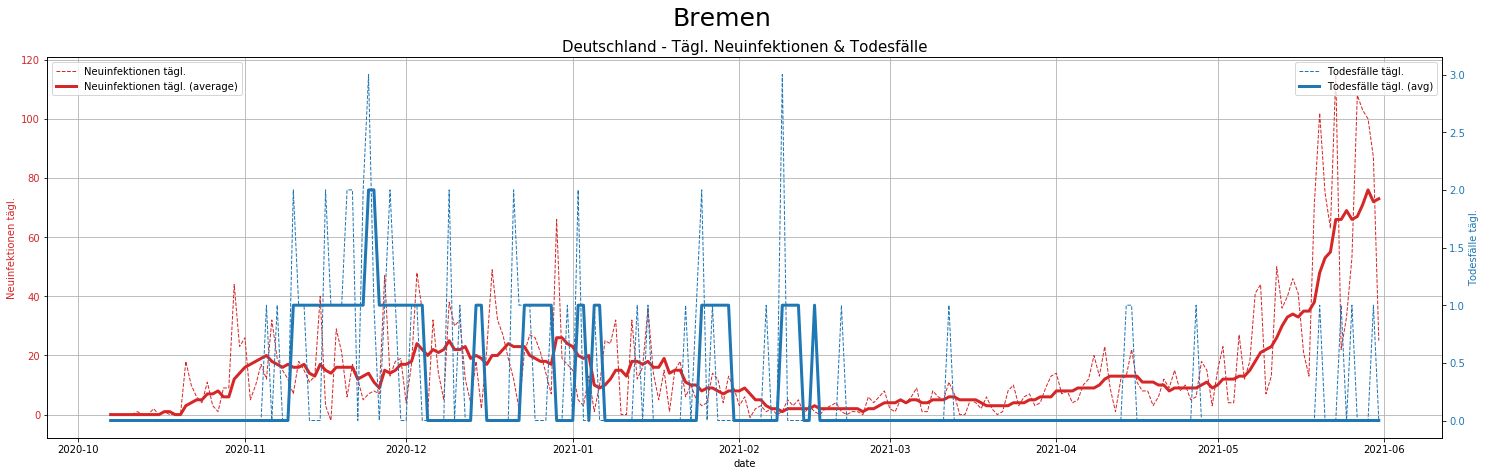

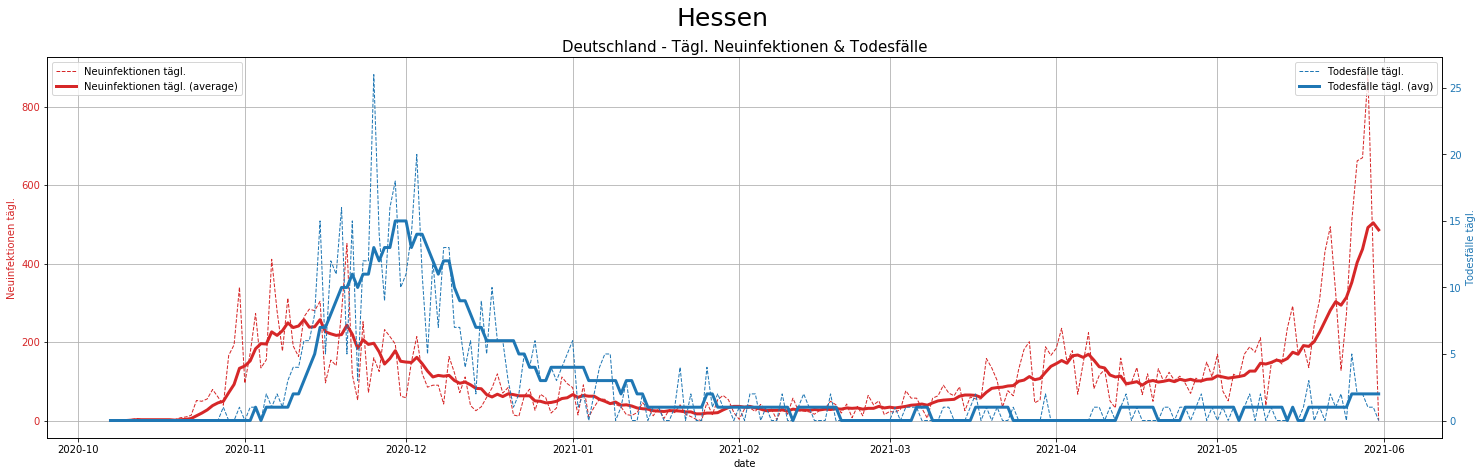

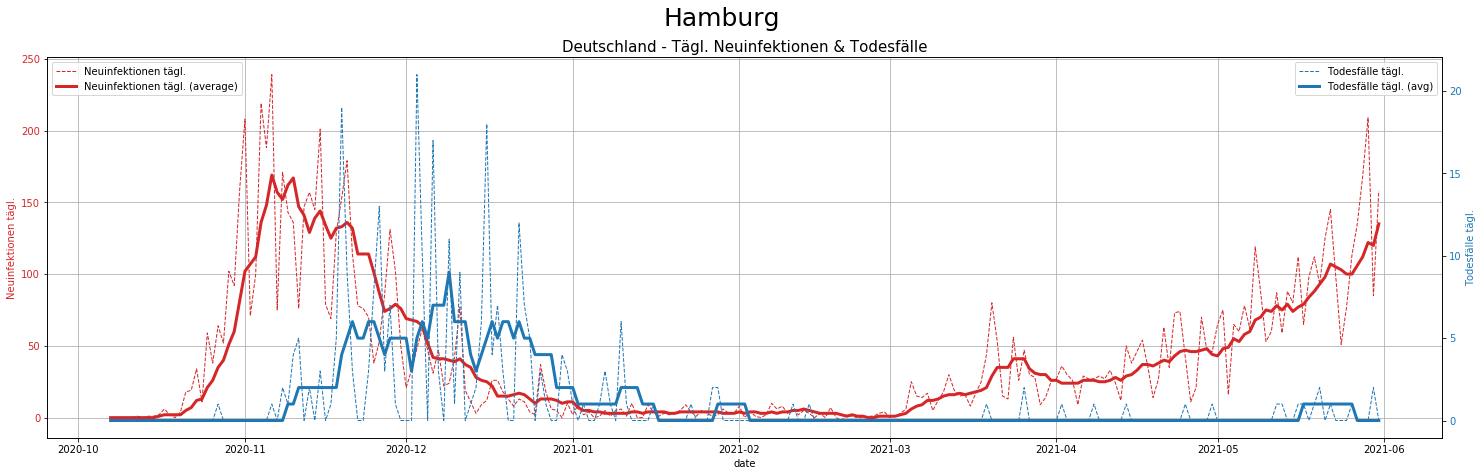

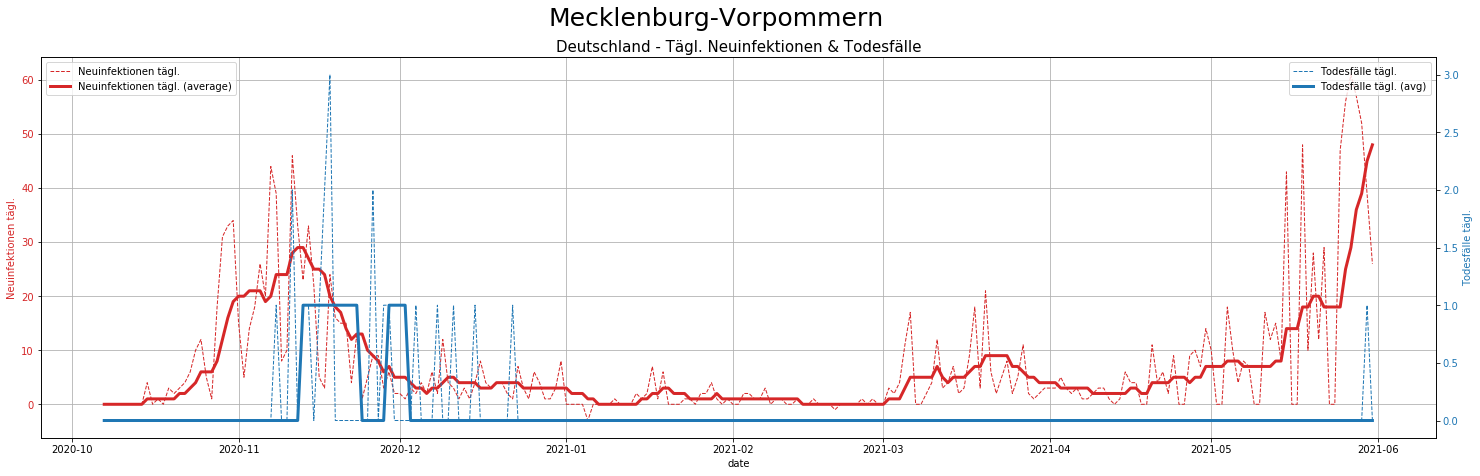

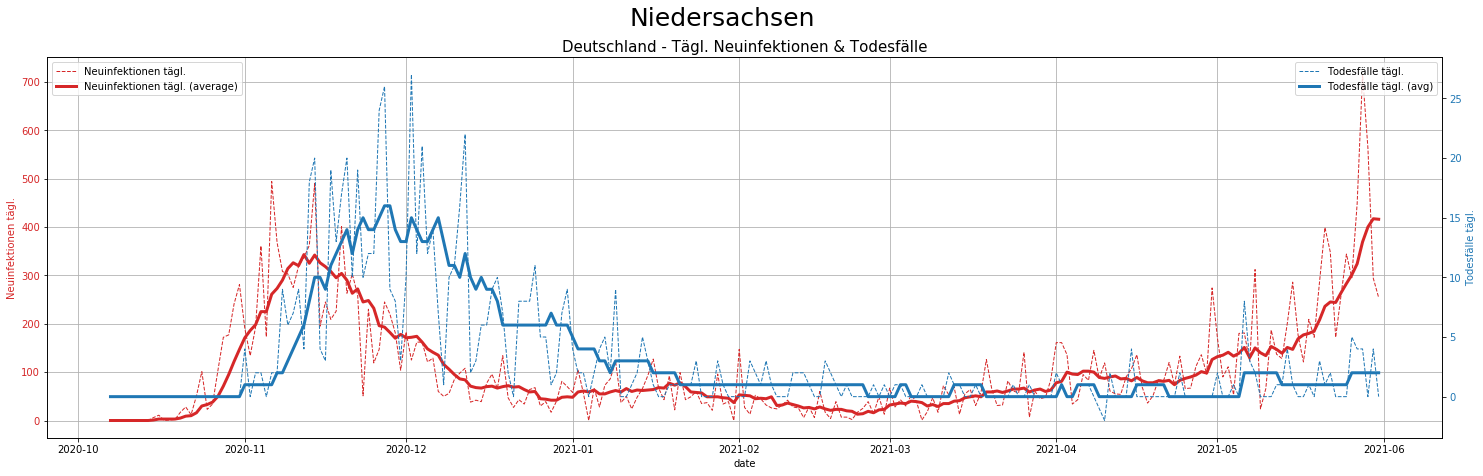

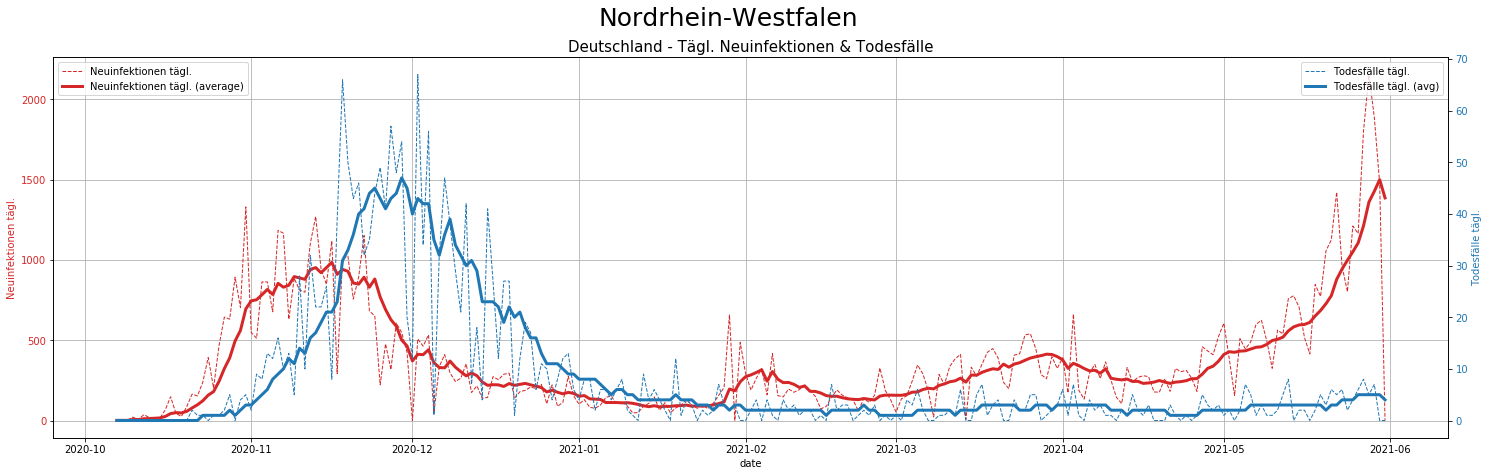

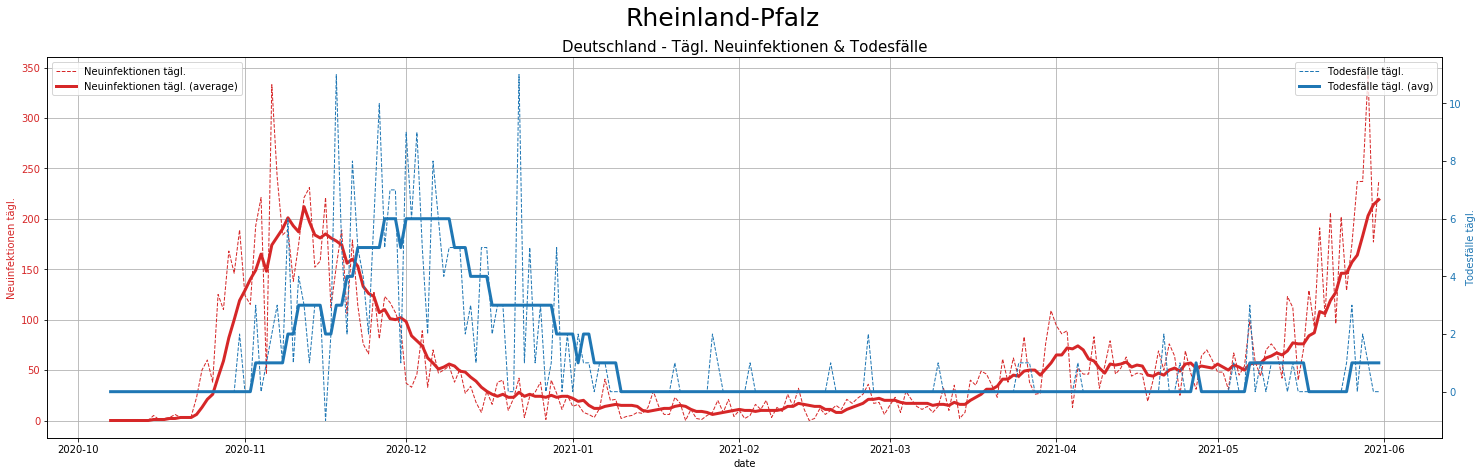

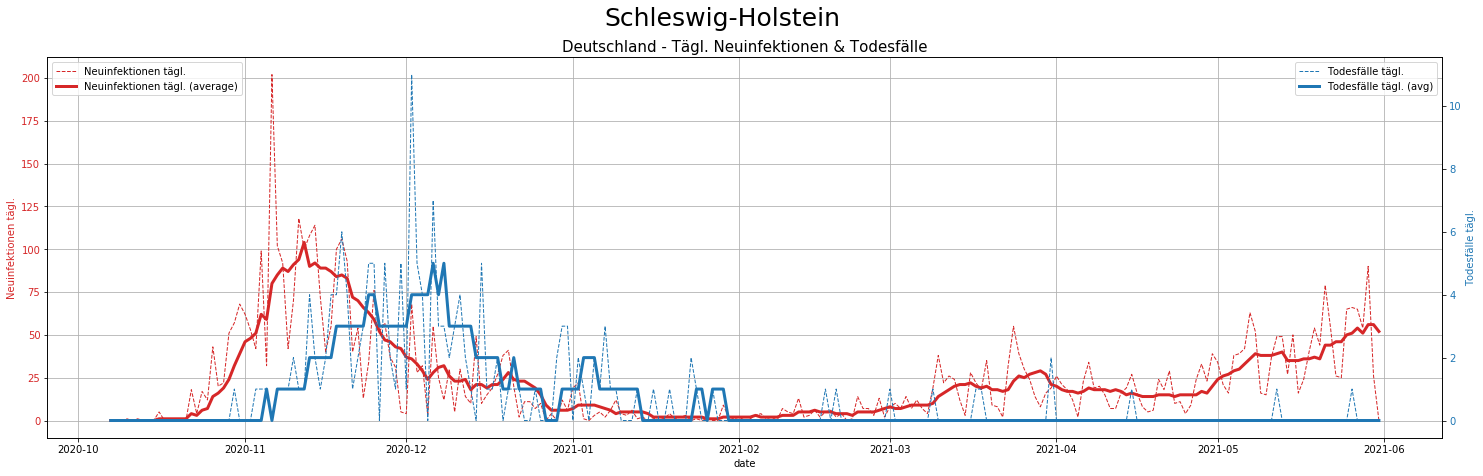

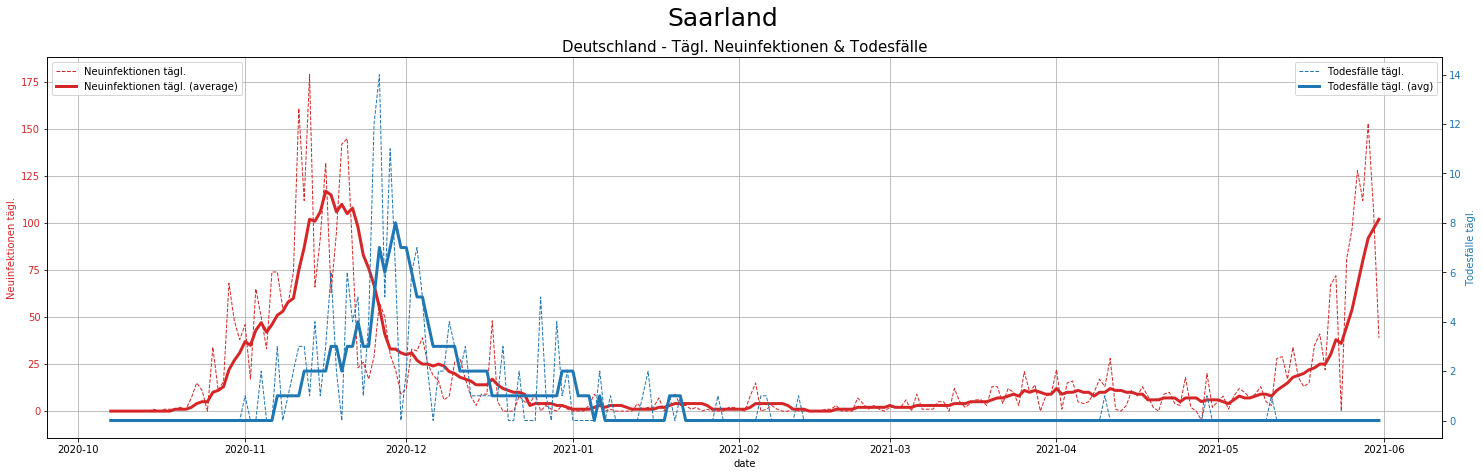

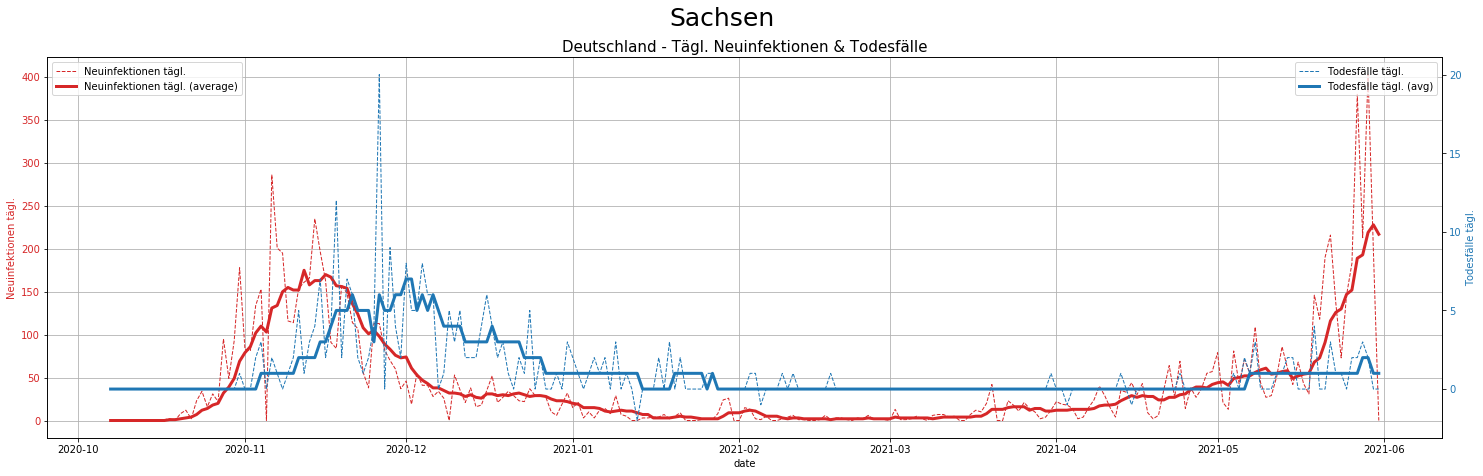

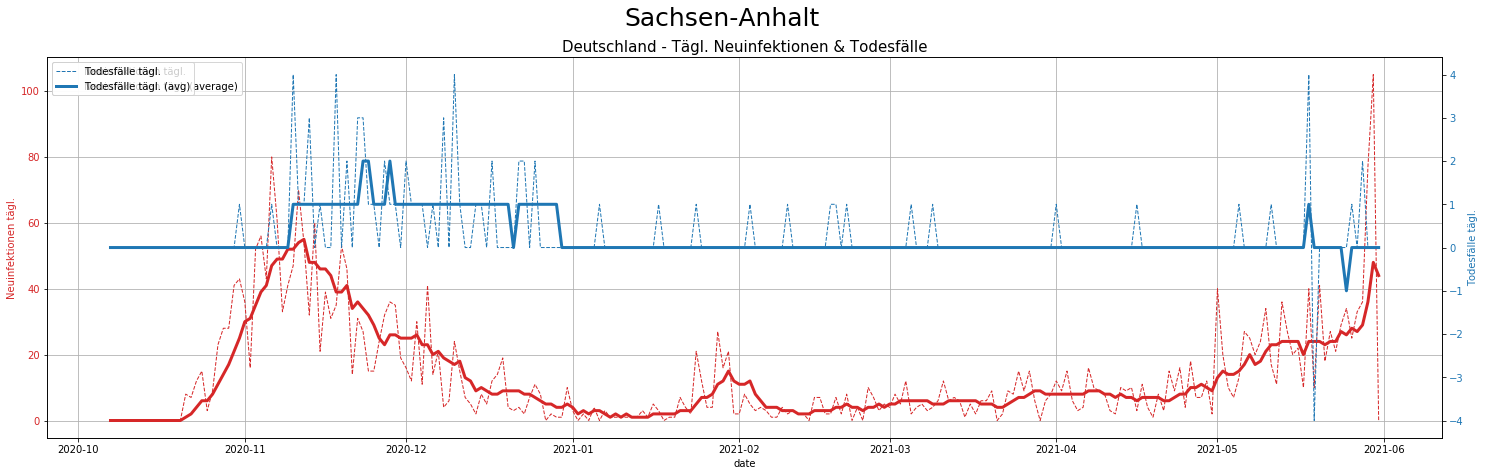

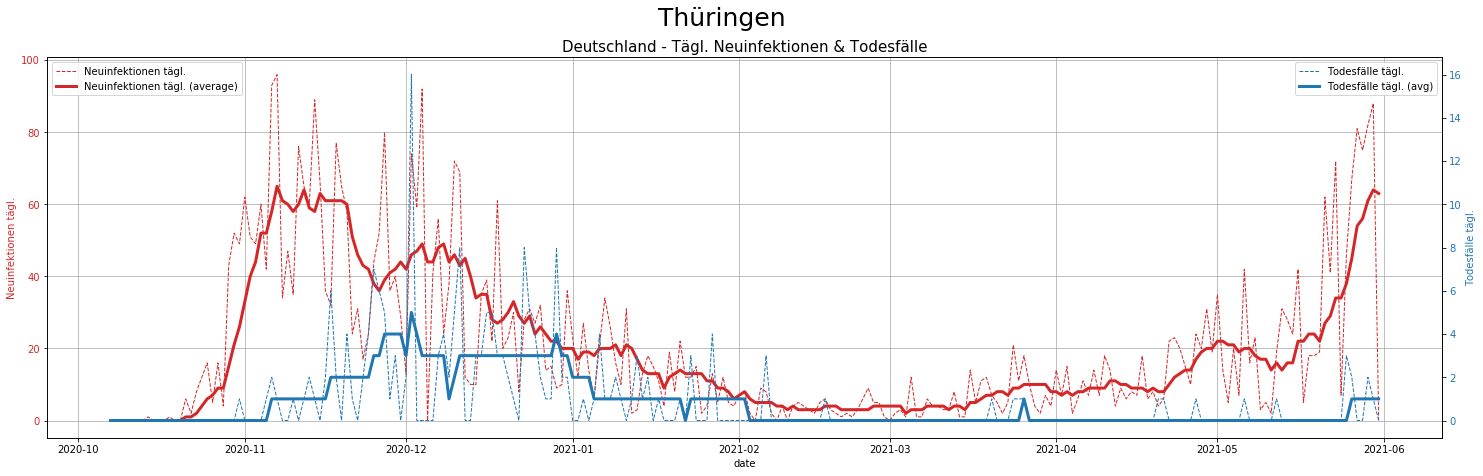

In [243]:
for s in states[:-1]:
    datelist = pd.date_range(end = date.today()-timedelta(days=1), periods = df_states[df_states.label==s].shape[0]-1).to_pydatetime().tolist()
    fig, ax1 = plt.subplots(figsize=(25, 7), sharey=True)

    color = 'tab:red'
    ax1.set_xlabel('date')
    ax1.set_ylabel('Neuinfektionen tägl.', color=color)
    ax1.plot(datelist, df_states[df_states.label==s].confirmed_delta[:-1], label='Neuinfektionen tägl.', ls="--", color=color, lw=1)
    ax1.plot(datelist, df_states[df_states.label==s].confirmed_delta_ma[:-1], label='Neuinfektionen tägl. (average)', color=color, lw=3)
    ax1.tick_params(axis='y', labelcolor=color)

    plt.legend()

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('Todesfälle tägl.', color=color)  # we already handled the x-label with ax1
    ax2.plot(datelist, df_states[df_states.label==s].deaths_delta[:-1], label='Todesfälle tägl.', ls="--", color=color, lw=1)
    ax2.plot(datelist, df_states[df_states.label==s].deaths_delta_ma[:-1], label='Todesfälle tägl. (avg)', color=color, lw=3)

    ax2.tick_params(axis='y', labelcolor=color)

    ax1.legend(loc=2)
    ax2.legend(loc=1)
    ax1.grid()

    plt.legend()
    plt.title("Deutschland - Tägl. Neuinfektionen & Todesfälle", fontsize=15)
    fig.suptitle(s, fontsize=25)

    plt.show()

## Daten-Anomalien

In [23]:
# df_negative_deaths = df_states #[df_states.label=="Sachsen-Anhalt"]
# df_negative_deaths[df_negative_deaths['deaths_delta'] < 0]

# Vergleich Bundesländer: Neuinfektionen

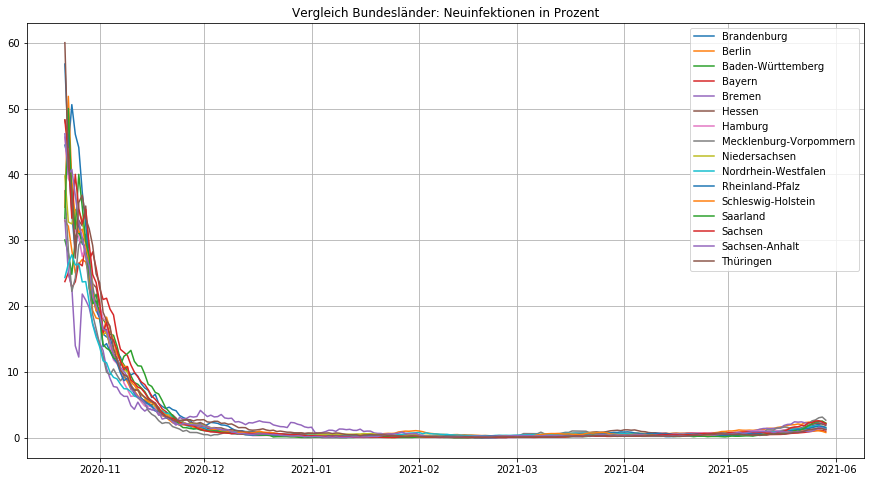

In [244]:
k=18 # won't show first k days
datelist = pd.date_range(end = last_day, periods = df_ger.shape[0]-k).to_pydatetime().tolist()

plt.figure(figsize = (15,8))
plt.grid()
for s in states[:-1]:
    plt.plot(datelist, np.array(df_states[df_states.label==s].confirmed_delta_ma[k:]) / np.array(df_states[df_states.label==s].confirmed_ma[k-1:-1]) * 100, 
             label=s)
plt.legend()
plt.title("Vergleich Bundesländer: Neuinfektionen in Prozent")
plt.show()

# Bundesländer: Fallzahlen & Todesfälle pro 100000 Einwohner**

In [247]:
temp = []
temp_d = []
check_date = df_states['timestamp'].iloc[-1]
for s in states[:-1]:
    c = df_states.loc[(df_states.timestamp==check_date)&(df_states.label==s), 'confirmed'].values[0]
    # r = df_states.loc[(df_states.timestamp==check_date)&(df_states.label==s), 'recovered'].values[0]
    # a = c - r # active
    d = df_states.loc[(df_states.timestamp==check_date)&(df_states.label==s), 'deaths'].values[0]
    
    if s=='Baden-Württemberg':
        p = population.loc['Baden-Wuerttemberg'].values[0]
    elif s=='Thüringen':
        p = population.loc['Thueringen'].values[0]
    else:
        p = population.loc[s].values[0]
        
    temp.append(c*100000/p)
    temp_d.append(d*100000/p)

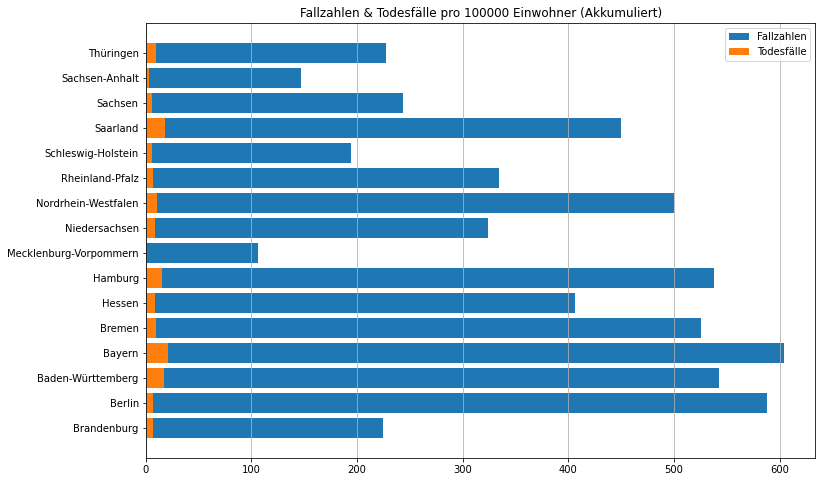

In [26]:
plt.figure(figsize=(12,8))
plt.grid(axis='x')
plt.title("Fallzahlen & Todesfälle pro 100000 Einwohner (Akkumuliert)")
plt.barh(states[:-1], temp, label='Fallzahlen')
plt.barh(states[:-1], temp_d, label='Todesfälle')
plt.legend()
plt.show()

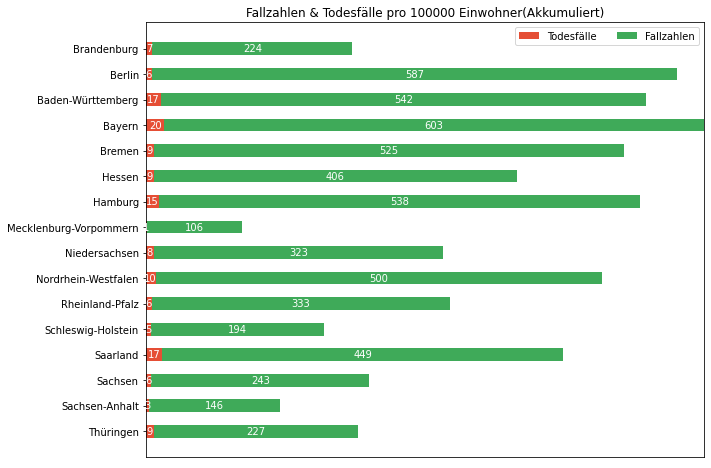

In [27]:
import numpy as np
import matplotlib.pyplot as plt

category_names = ['Todesfälle', 'Fallzahlen']

labels = list(states[:-1])
data = np.array(list(zip(temp_d,temp)))
data_cum = data.cumsum(axis=1)
category_colors = plt.get_cmap('RdYlGn')(
    np.linspace(0.15, 0.85, data.shape[1]))

fig, ax = plt.subplots(figsize=(10, 8))
ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.set_xlim(0, np.sum(data, axis=1).max())

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    widths = data[:, i]
    starts = data_cum[:, i] - widths
    ax.barh(labels, widths, left=starts, height=0.5,
            label=colname, color=color)
    xcenters = starts + widths / 2

    r, g, b, _ = color
    text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    for y, (x, c) in enumerate(zip(xcenters, widths)):
        ax.text(x, y, str(int(c)), ha='center', va='center',
                color=text_color)
ax.legend(ncol=len(category_names),loc=1)

plt.title("Fallzahlen & Todesfälle pro 100000 Einwohner(Akkumuliert)")
plt.show()

# Einwohner pro Bundesland

In [248]:
for key, value in population.items() :
    print (key, value)

population state
Baden-Wuerttemberg        11069533
Bayern                    13076721
Berlin                     3644826
Brandenburg                2511917
Bremen                      682986
Hamburg                    1841179
Hessen                     6265809
Mecklenburg-Vorpommern     1609675
Niedersachsen              7982448
Nordrhein-Westfalen       17932651
Rheinland-Pfalz            4084844
Saarland                    990509
Sachsen                    4077937
Sachsen-Anhalt             2208321
Schleswig-Holstein         2896712
Thueringen                 2143145
Name: population, dtype: int64


# Vergleich: Fallzahlen je 100000 Einwohner pro Bundesland (Akkumuliert)

In [254]:
df_states["pop"] = 0

for s in states[:-1]:
    if s=='Baden-Württemberg':
        p = population.loc['Baden-Wuerttemberg'].values[0]
    elif s=='Thüringen':
        p = population.loc['Thueringen'].values[0]
    else:
        p = population.loc[s].values[0]
        
    for i in df_states[df_states.label==s].index:
        df_states.loc[i, 'pop'] = int(p)
        
df = df_states[df_states.label != "weitere Fälle bundesweit"]
df_states = df

df_states["conf_pro_pop"] = df_states["confirmed"] * 10000 / df_states["pop"] 
df_states["deaths_pro_pop"] = df_states["deaths"] * 10000 / df_states["pop"]

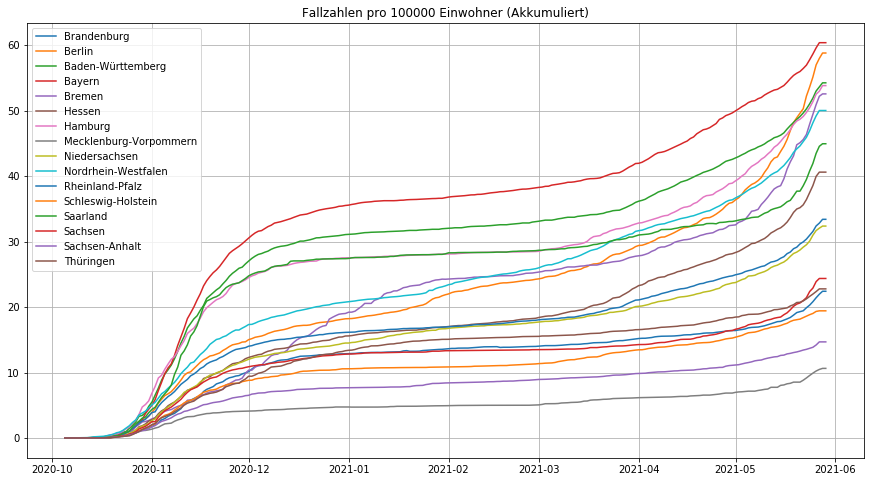

In [255]:
datelist = pd.date_range(end=last_day, periods=df_states[df_states.label=='Berlin'].shape[0]-1).to_pydatetime().tolist()

plt.figure(figsize=(15,8))
plt.title("Fallzahlen pro 100000 Einwohner (Akkumuliert)")
for s in states[:-1]:
    plt.plot(datelist, df_states[df_states.label==s]["conf_pro_pop"][1:], label=s)
plt.legend()
plt.grid()

# Bundesländer: COVID-19 Sterblichkeit (=Tote/Fälle, Prozentual)

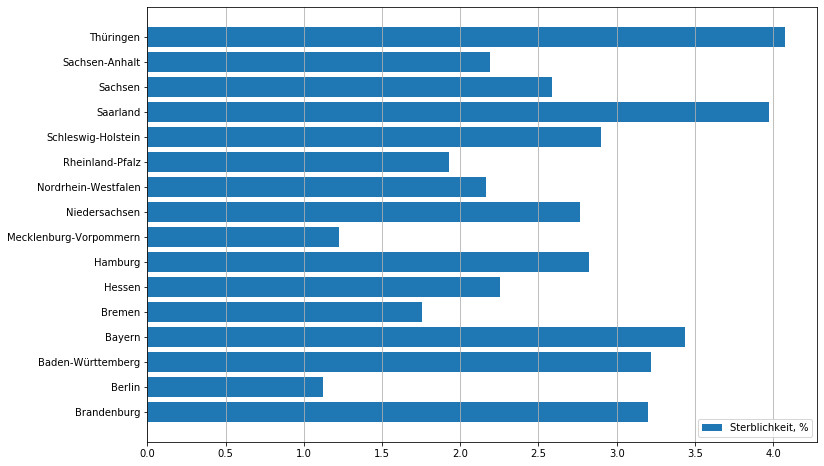

In [256]:
plt.figure(figsize=(12,8))
plt.grid(axis='x')
plt.barh(states[:-1], np.array(temp_d)/np.array(temp)*100, label='Sterblichkeit, %')
plt.legend()
plt.show()

# Demografie nach Alter & Geschlecht

In [257]:
stat_ger = df_old[['gender', 'age_group', 'cases', 'deaths']].groupby(['gender', 'age_group']).sum()
stat_ger = stat_ger.reset_index()

demo_ger = demographics[['gender', 'age_group', 'population']].groupby(['gender', 'age_group']).sum()
demo_ger = demo_ger.reset_index()

In [258]:
def autolabel(rects, multiplier=100, suffix='%'):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}{}'.format(round(height*multiplier,2),suffix),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom'
                    #, fontsize=14
                    )

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:56: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


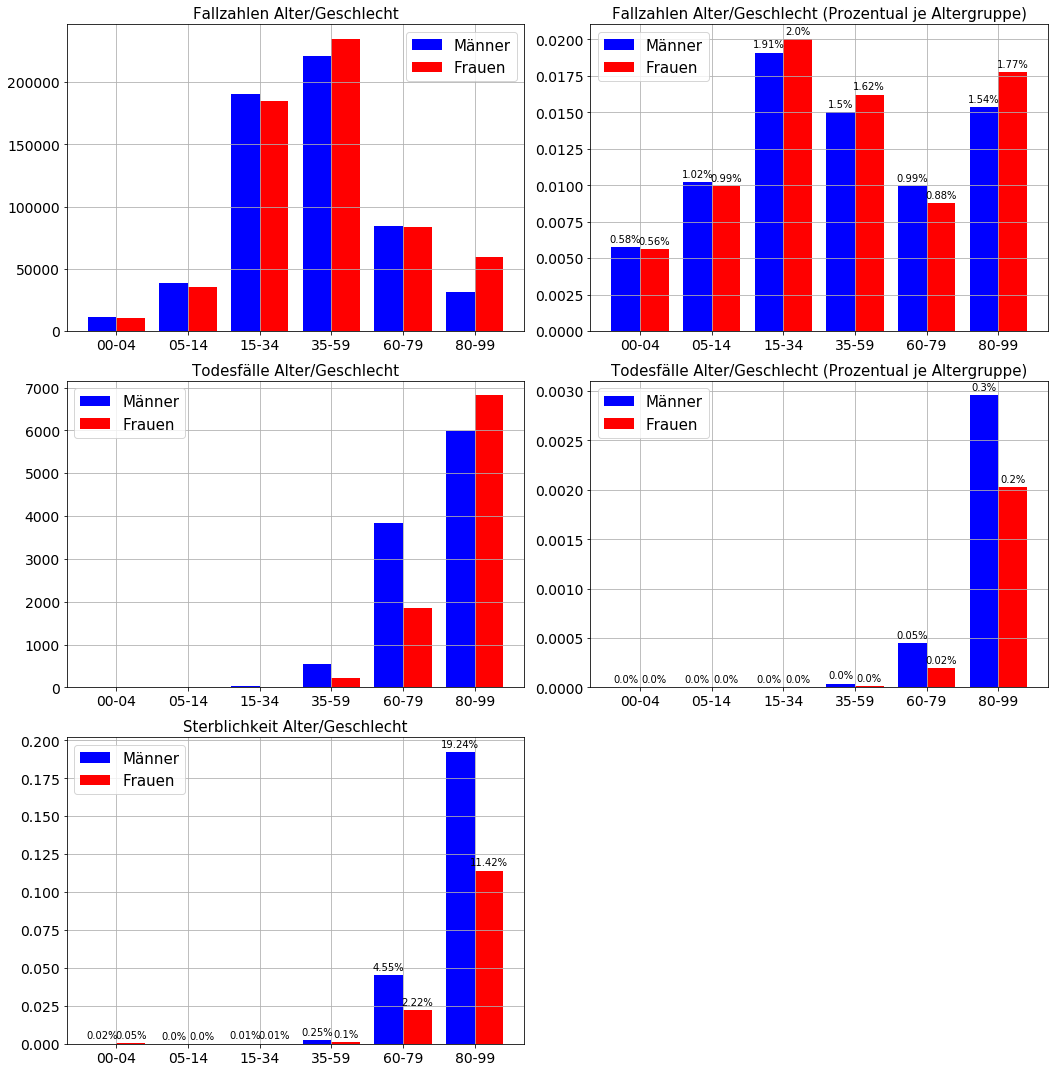

In [259]:
x = np.arange(6)
ages = stat_ger.age_group.unique()
width=0.4
color1 = 'blue'
color2 = 'red'
legend_fontsize = 15
title_fontsize = 15
tick_fontsize = 14


fig = plt.figure(figsize=(15, 15))
gs = gridspec.GridSpec(3, 2)

ax = fig.add_subplot(gs[0, 0])
ax.bar(x - width/2, stat_ger[stat_ger.gender=="M"].cases, width, label='Männer', color=color1)
ax.bar(x + width/2, stat_ger[stat_ger.gender=="F"].cases, width, label='Frauen', color=color2)
ax.set_title("Fallzahlen Alter/Geschlecht", fontsize=title_fontsize)
ax.set_xticks(x)
ax.set_xticklabels(ages)
ax.tick_params(axis='x', labelsize=tick_fontsize)
ax.tick_params(axis='y', labelsize=tick_fontsize)
ax.legend(fontsize=legend_fontsize)
ax.grid()

ax = fig.add_subplot(gs[0, 1])
rects1 = ax.bar(x - width/2, np.array(stat_ger[stat_ger.gender=="M"].cases) / 
                np.array(demo_ger[demo_ger.gender=="male"].population), width, label='Männer', color=color1)
rects2 = ax.bar(x + width/2, np.array(stat_ger[stat_ger.gender=="F"].cases) / 
                np.array(demo_ger[demo_ger.gender=="female"].population), width, label='Frauen', color=color2)
ax.set_title("Fallzahlen Alter/Geschlecht (Prozentual je Altergruppe)", fontsize=title_fontsize)
ax.set_xticks(x)
ax.set_xticklabels(ages)
ax.tick_params(axis='x', labelsize=tick_fontsize)
ax.tick_params(axis='y', labelsize=tick_fontsize)
ax.legend(fontsize=legend_fontsize)
ax.grid()

autolabel(rects1)
autolabel(rects2)

ax = fig.add_subplot(gs[1, 0])
ax.bar(x - width/2, stat_ger[stat_ger.gender=="M"].deaths, width, label='Männer', color=color1)
ax.bar(x + width/2, stat_ger[stat_ger.gender=="F"].deaths, width, label='Frauen', color=color2)
ax.set_title("Todesfälle Alter/Geschlecht", fontsize=title_fontsize)
ax.set_xticks(x)
ax.set_xticklabels(ages)
ax.tick_params(axis='x', labelsize=tick_fontsize)
ax.tick_params(axis='y', labelsize=tick_fontsize)
ax.legend(fontsize=legend_fontsize)
ax.grid()

ax = fig.add_subplot(gs[1, 1])
rects3 = ax.bar(x - width/2, np.array(stat_ger[stat_ger.gender=="M"].deaths) / 
                np.array(demo_ger[demographics.gender=="male"].population), width, label='Männer', color=color1)
rects4 = ax.bar(x + width/2, np.array(stat_ger[stat_ger.gender=="F"].deaths) / 
                np.array(demo_ger[demographics.gender=="female"].population), width, label='Frauen', color=color2)
ax.set_title("Todesfälle Alter/Geschlecht (Prozentual je Altergruppe)", fontsize=title_fontsize)
ax.set_xticks(x)
ax.set_xticklabels(ages)
ax.tick_params(axis='x', labelsize=tick_fontsize)
ax.tick_params(axis='y', labelsize=tick_fontsize)
ax.legend(fontsize=legend_fontsize)
ax.grid()

autolabel(rects3)
autolabel(rects4)

ax = fig.add_subplot(gs[2, 0])
rects5 = ax.bar(x - width/2, np.array(stat_ger[stat_ger.gender=="M"].deaths) / np.array(stat_ger[stat_ger.gender=="M"].cases), 
                width, label='Männer', color=color1)
rects6 = ax.bar(x + width/2, np.array(stat_ger[stat_ger.gender=="F"].deaths) / np.array(stat_ger[stat_ger.gender=="F"].cases), 
                width, label='Frauen', color=color2)
ax.set_title("Sterblichkeit Alter/Geschlecht", fontsize=title_fontsize)
ax.set_xticks(x)
ax.set_xticklabels(ages)
ax.tick_params(axis='x', labelsize=tick_fontsize)
ax.tick_params(axis='y', labelsize=tick_fontsize)
ax.legend(fontsize=legend_fontsize)
ax.grid()

autolabel(rects5)
autolabel(rects6)

plt.tight_layout()
plt.show()

# Bundesländer: Demografie nach Alter & Geschlecht

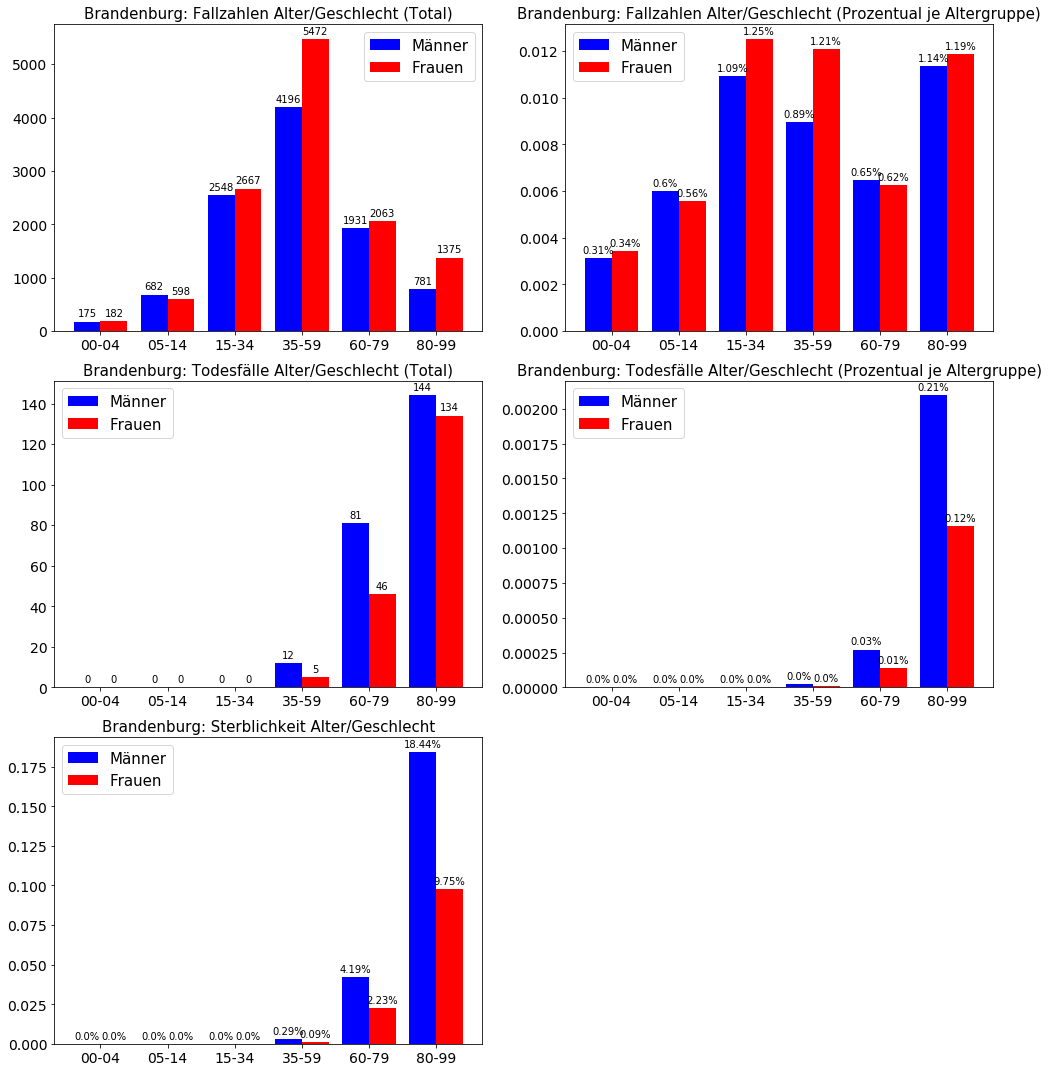

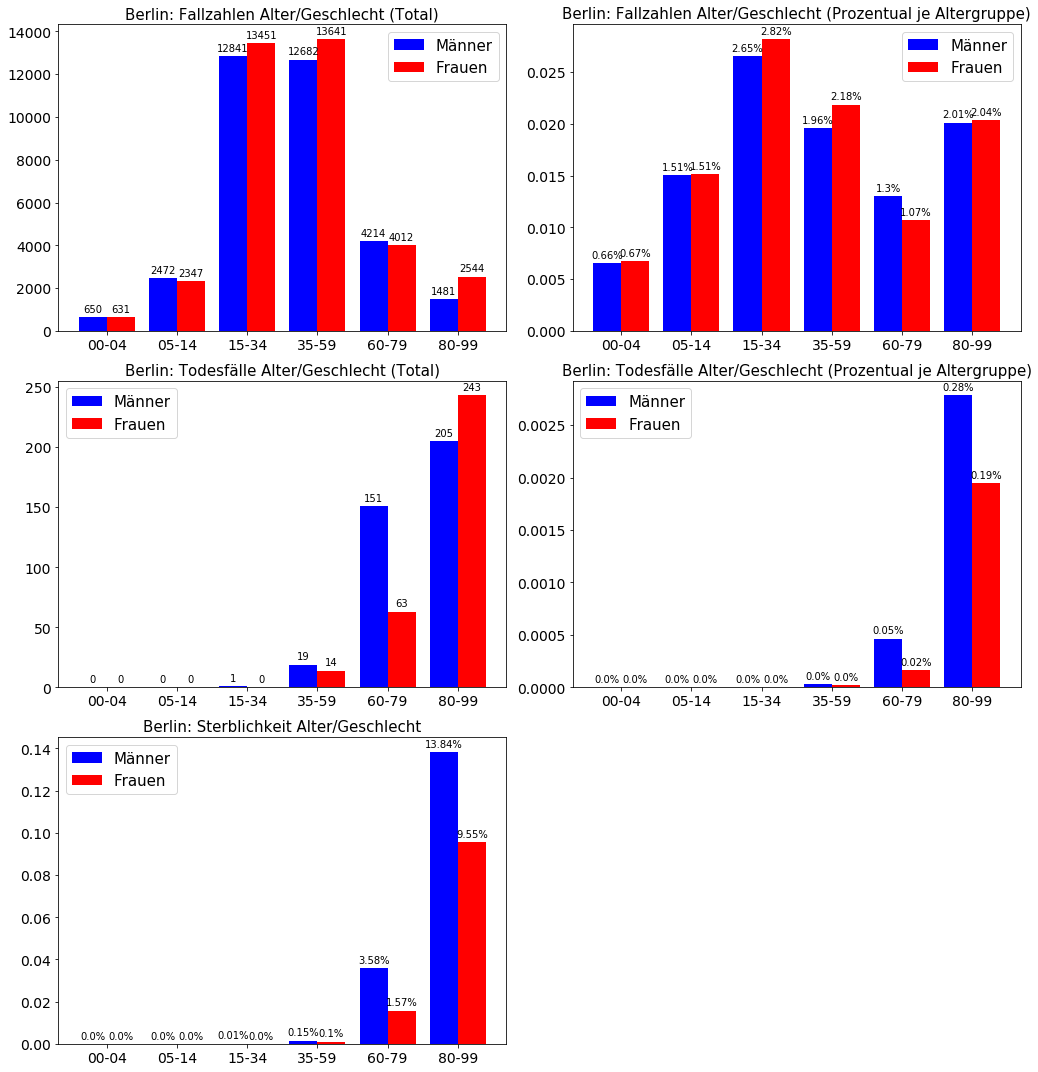

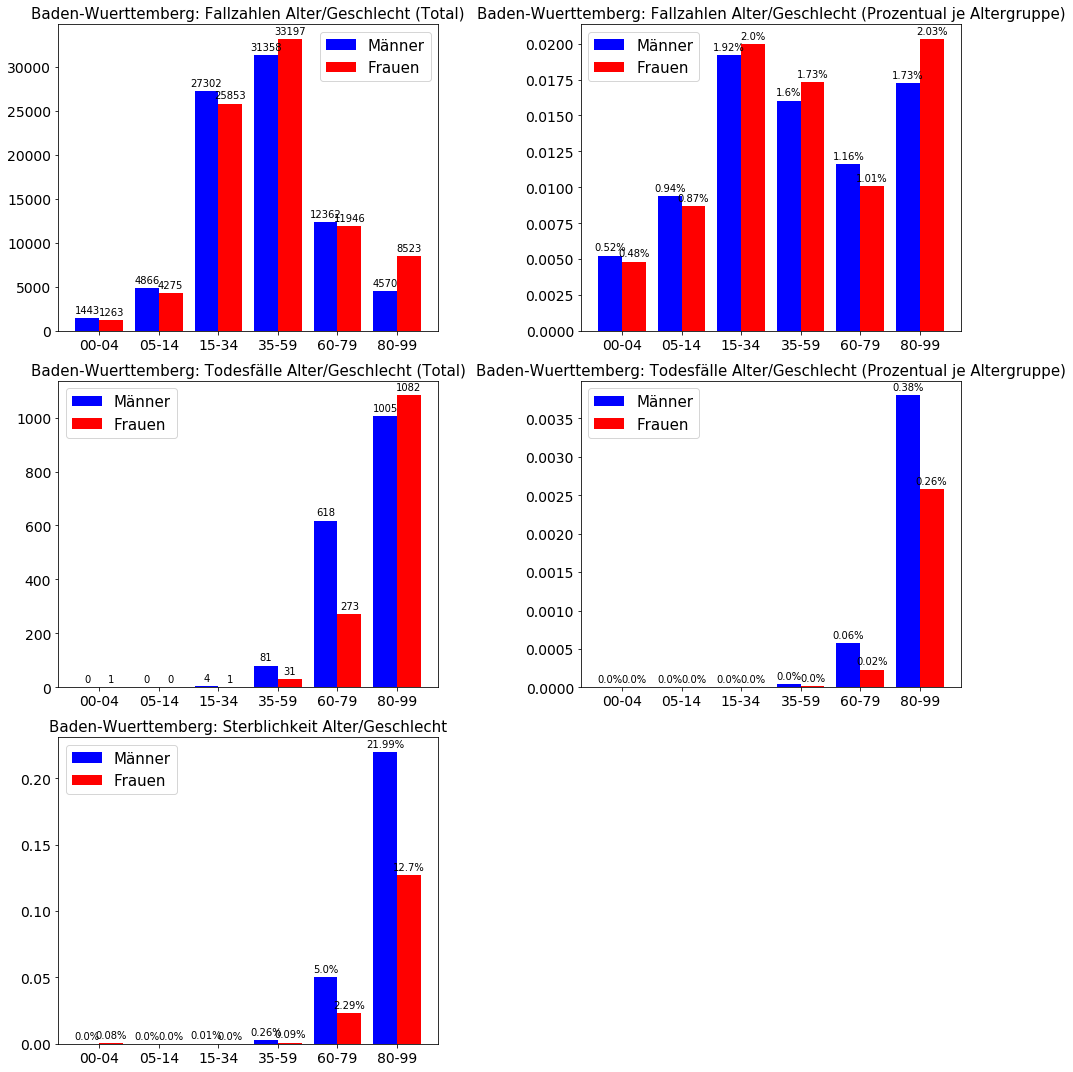

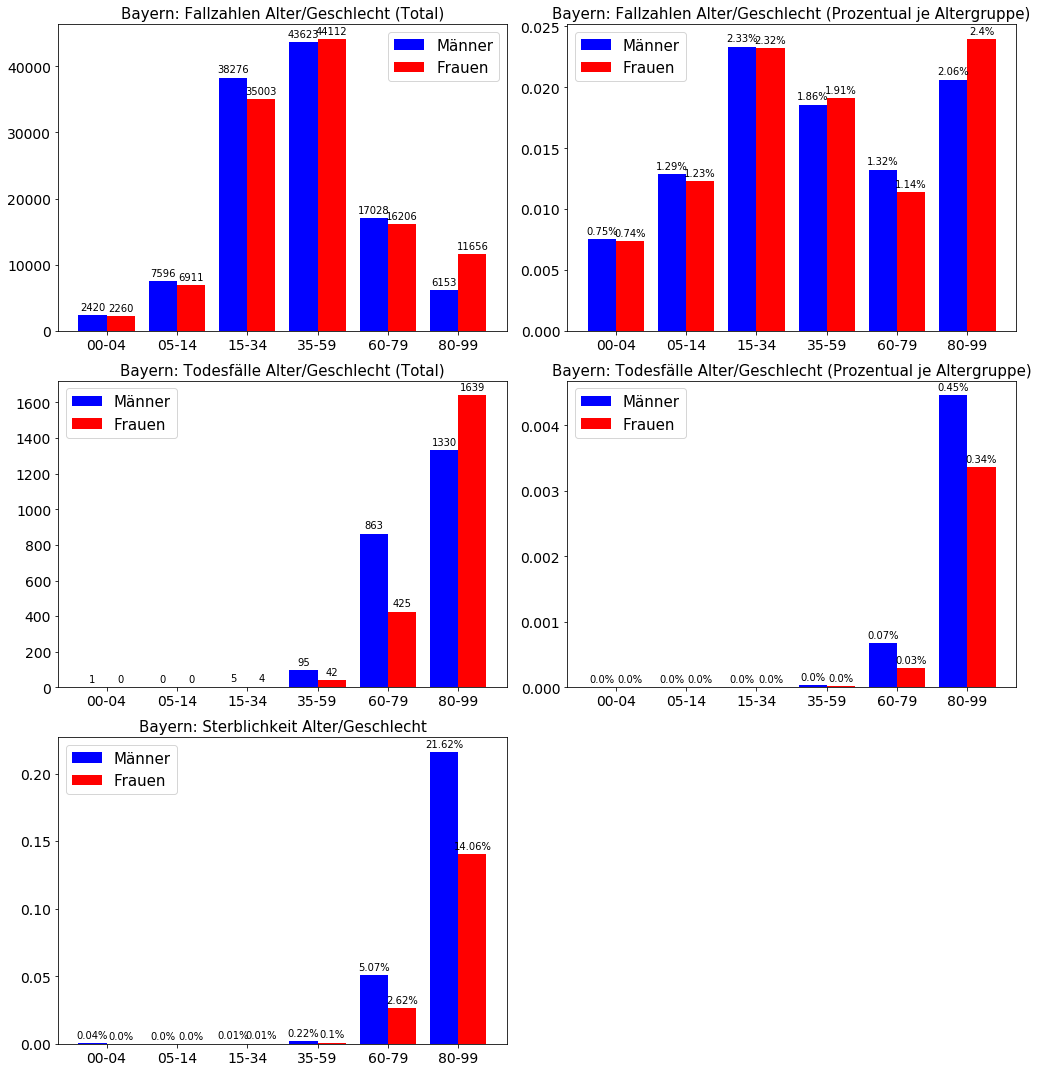

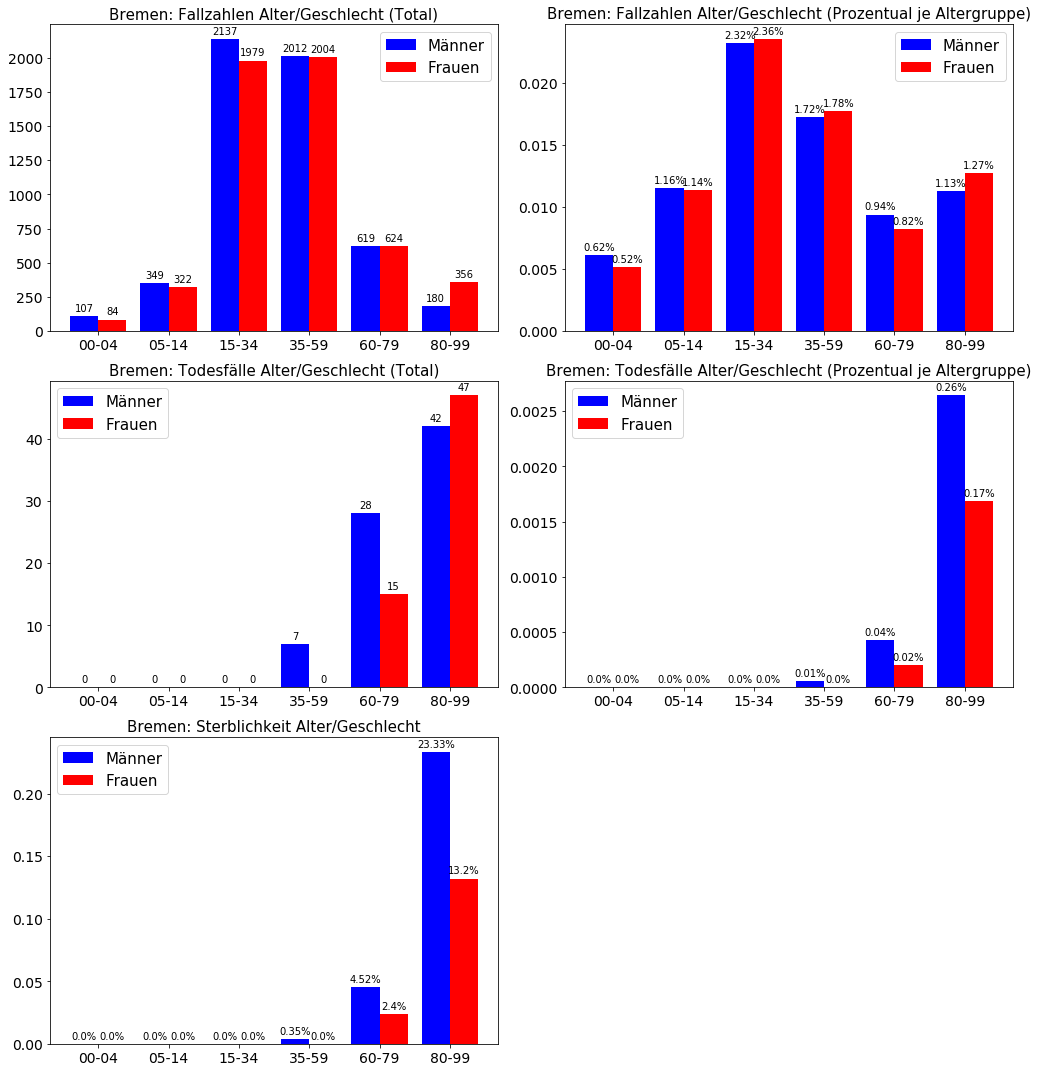

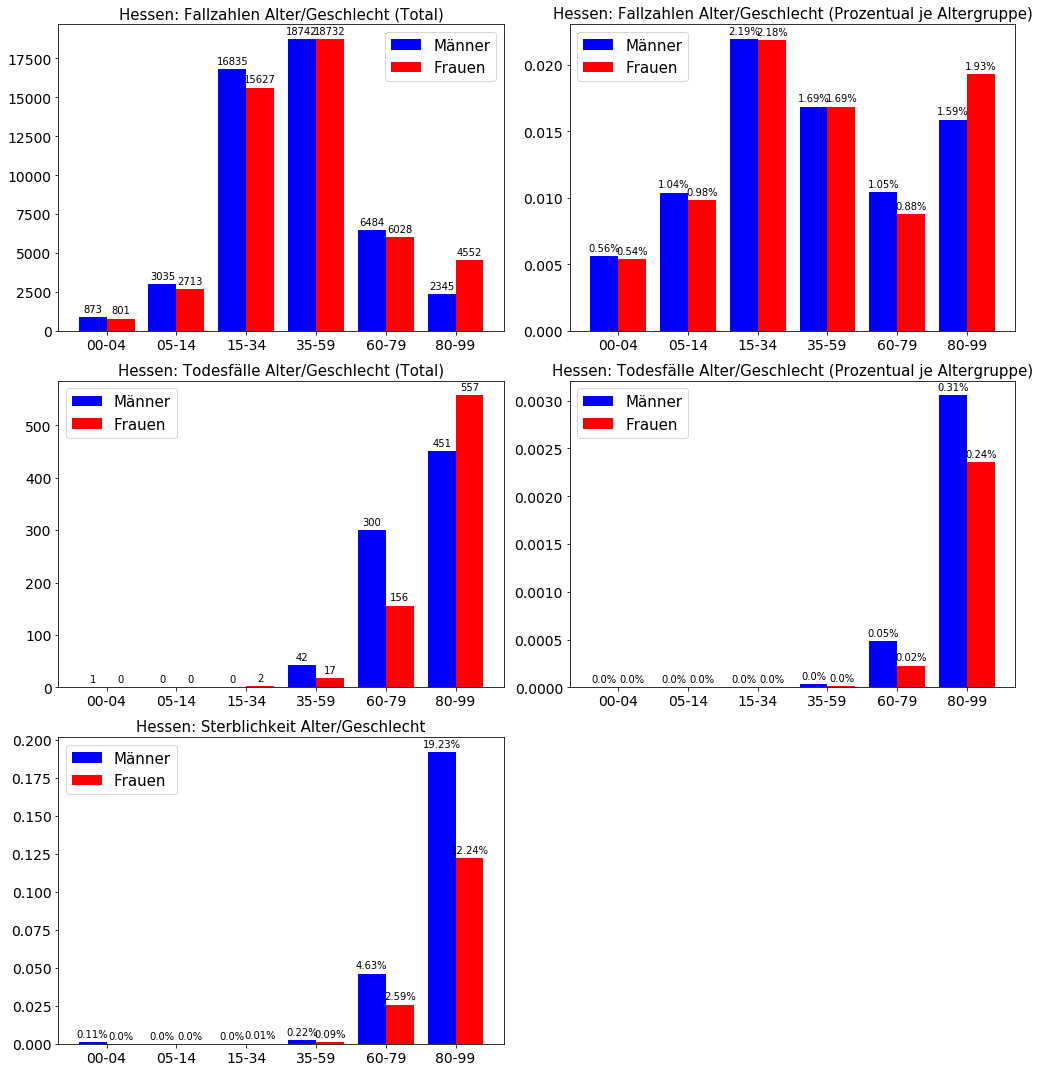

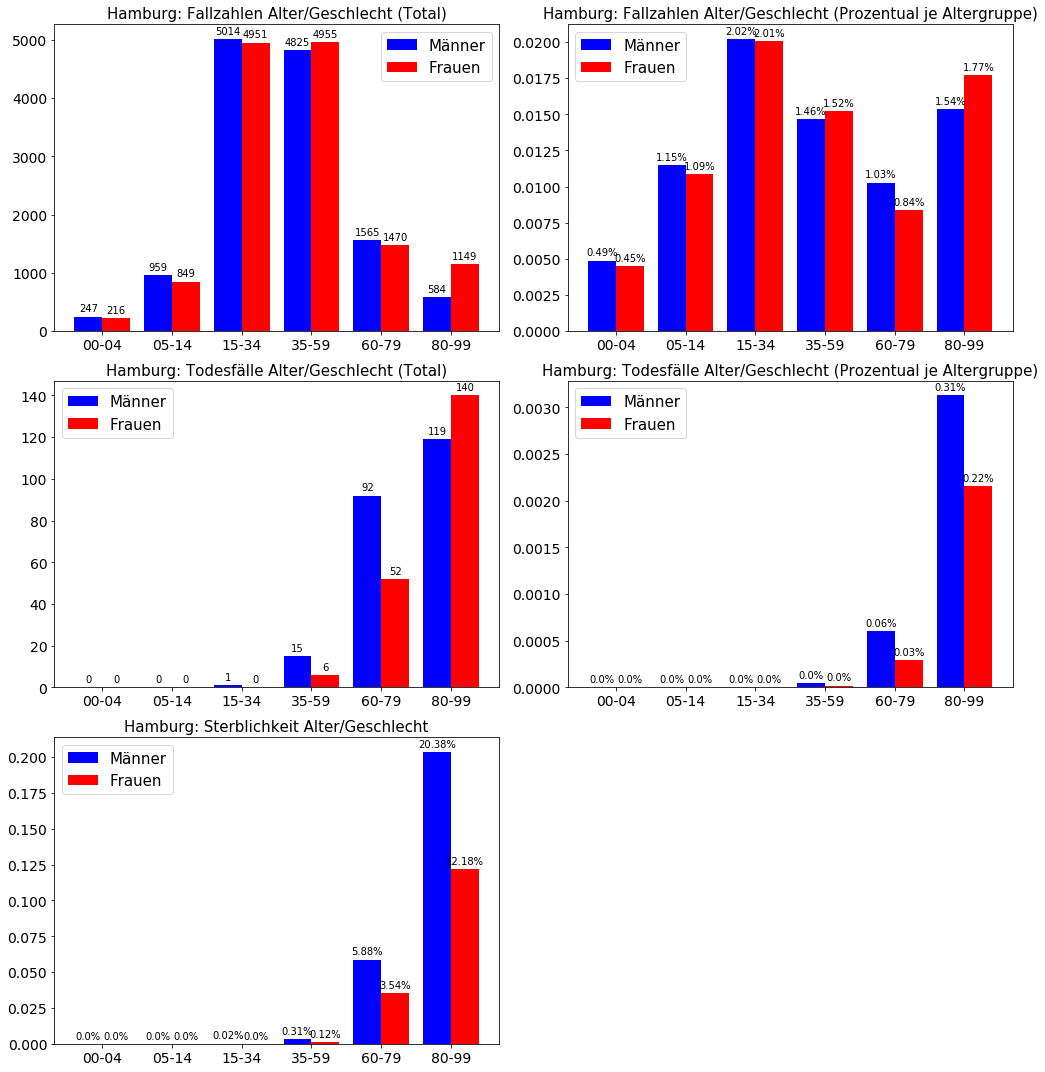

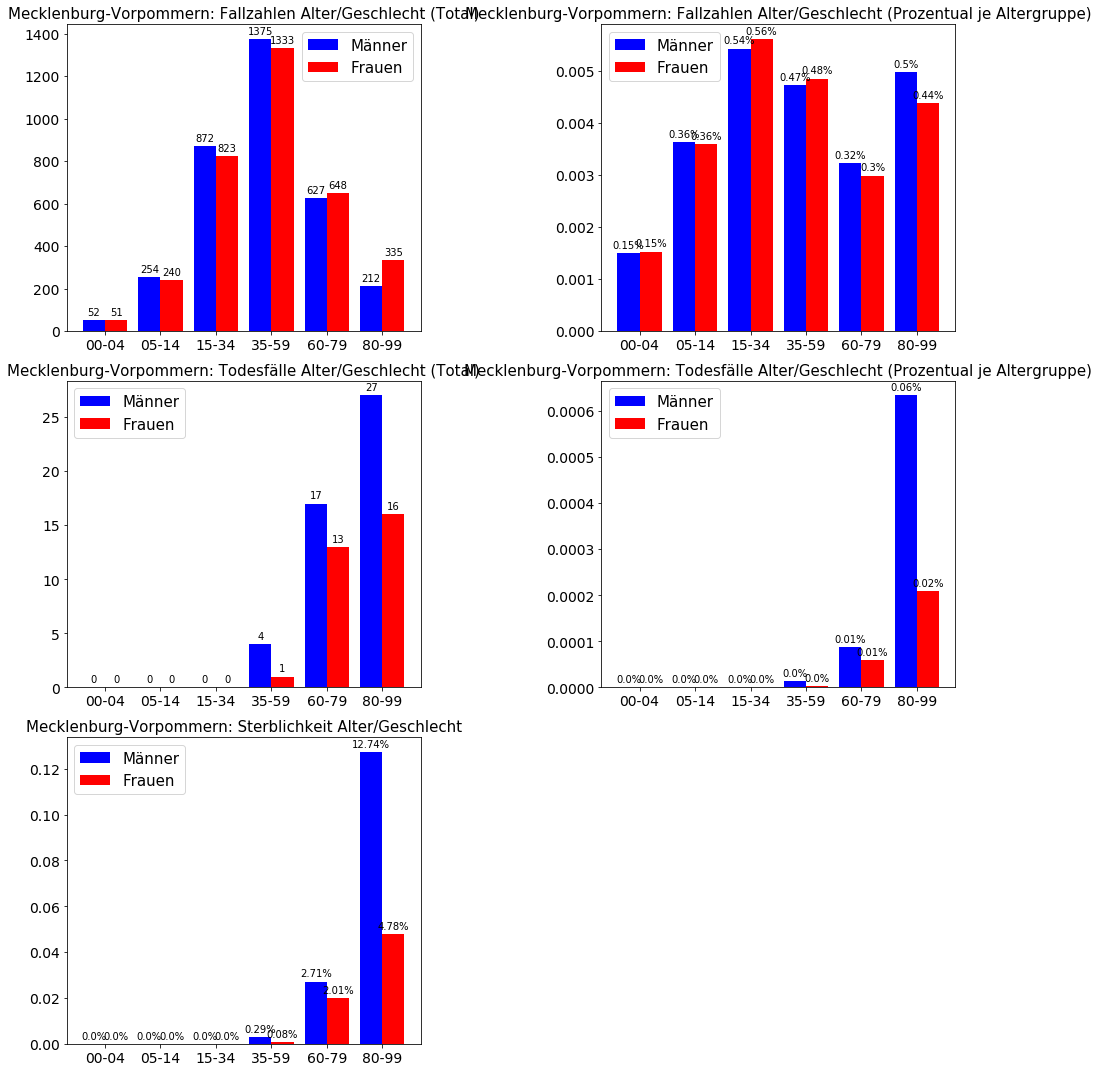

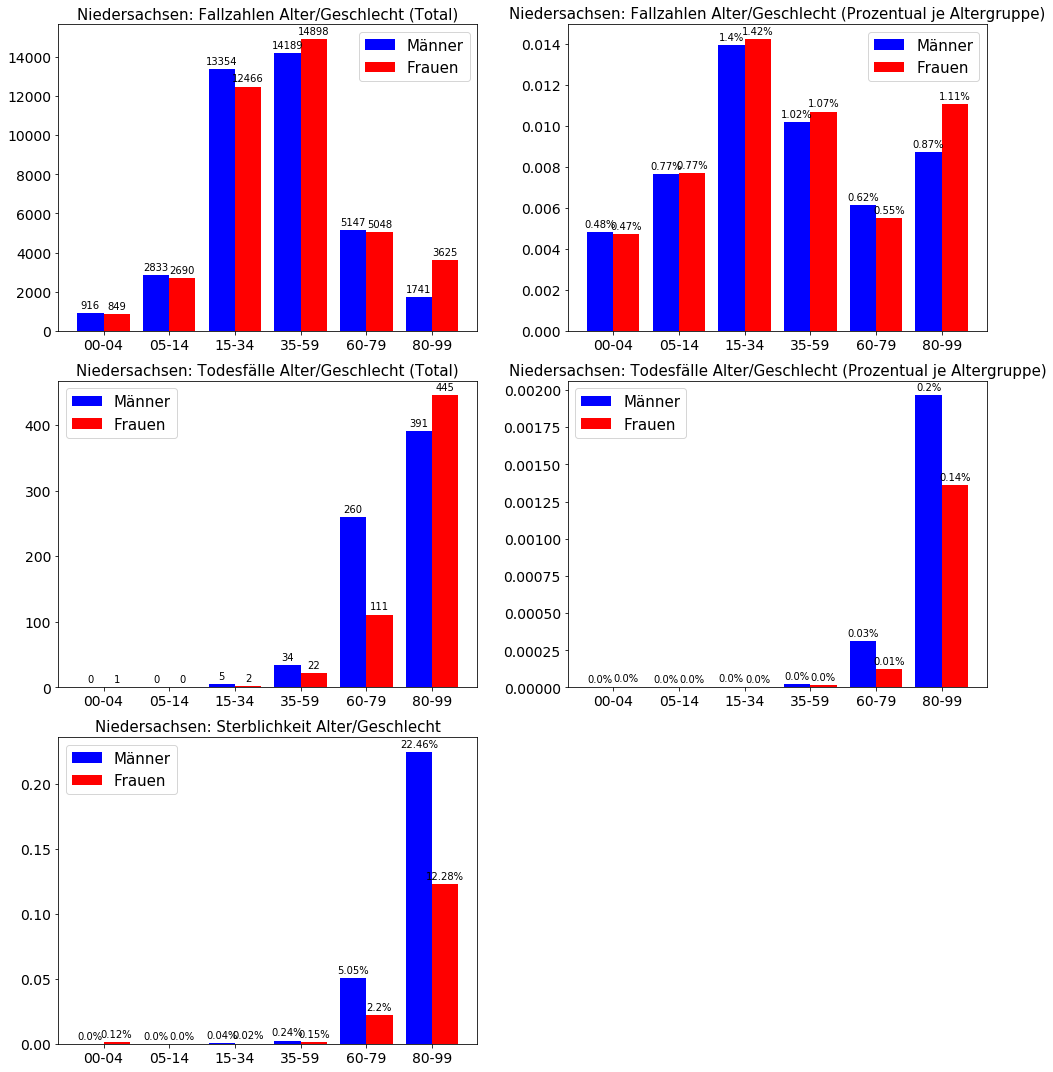

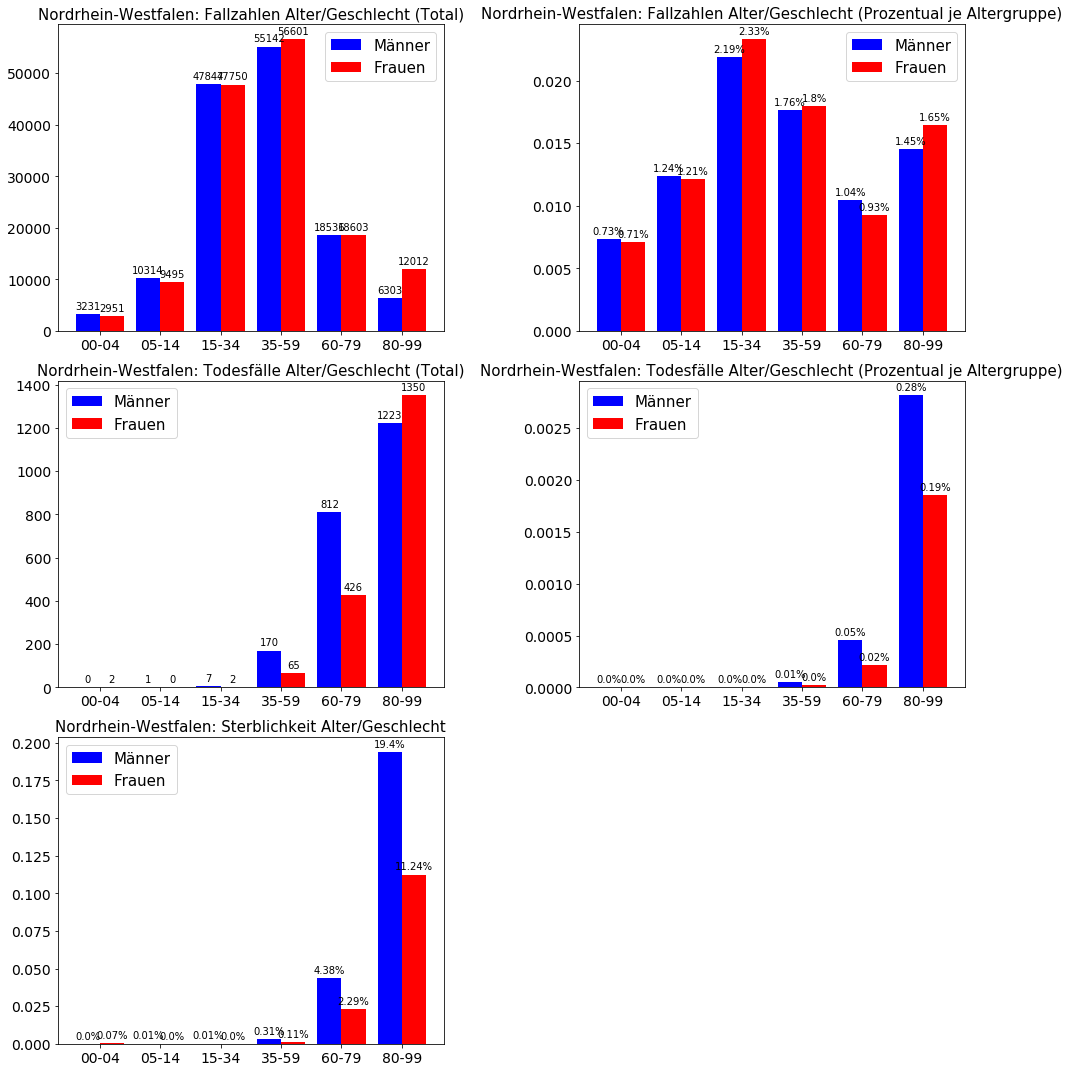

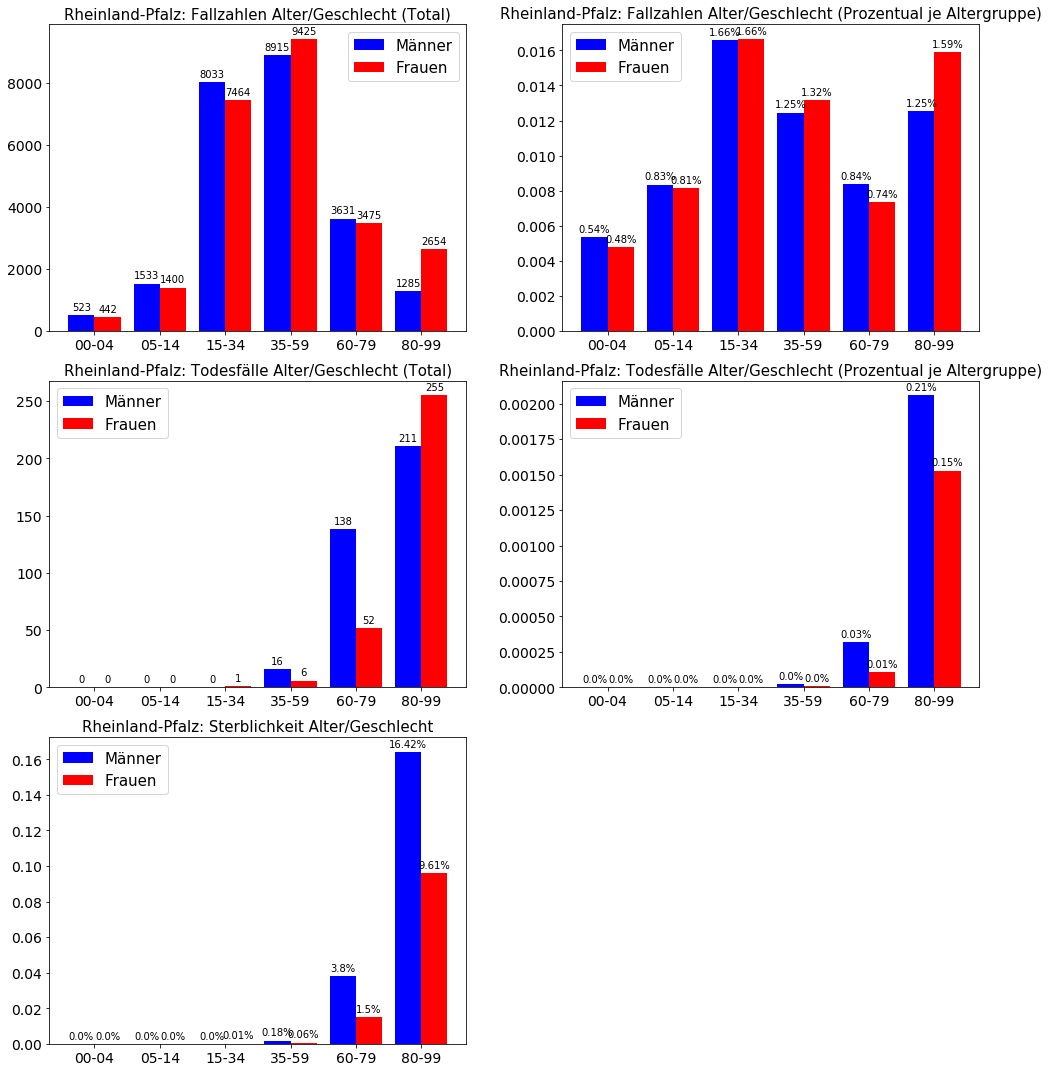

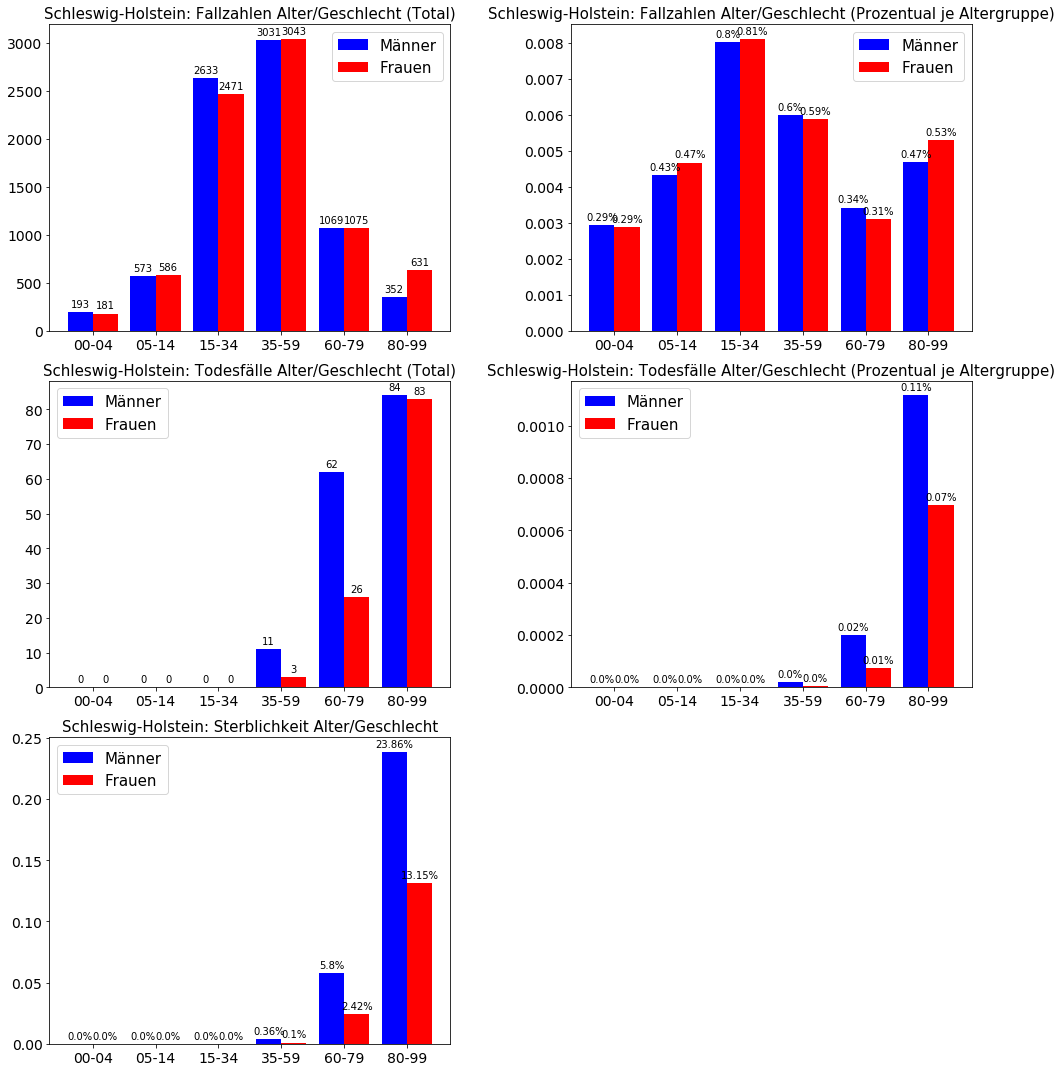

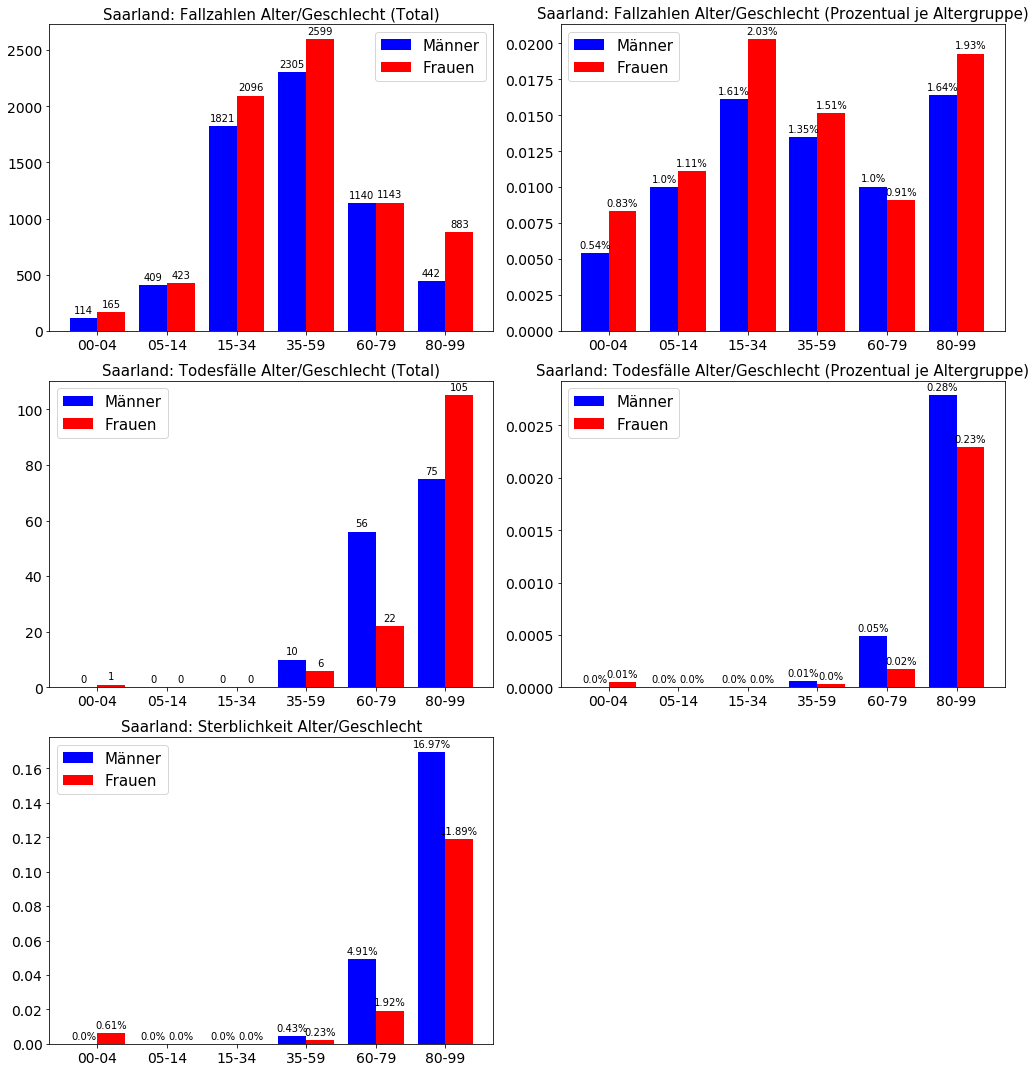

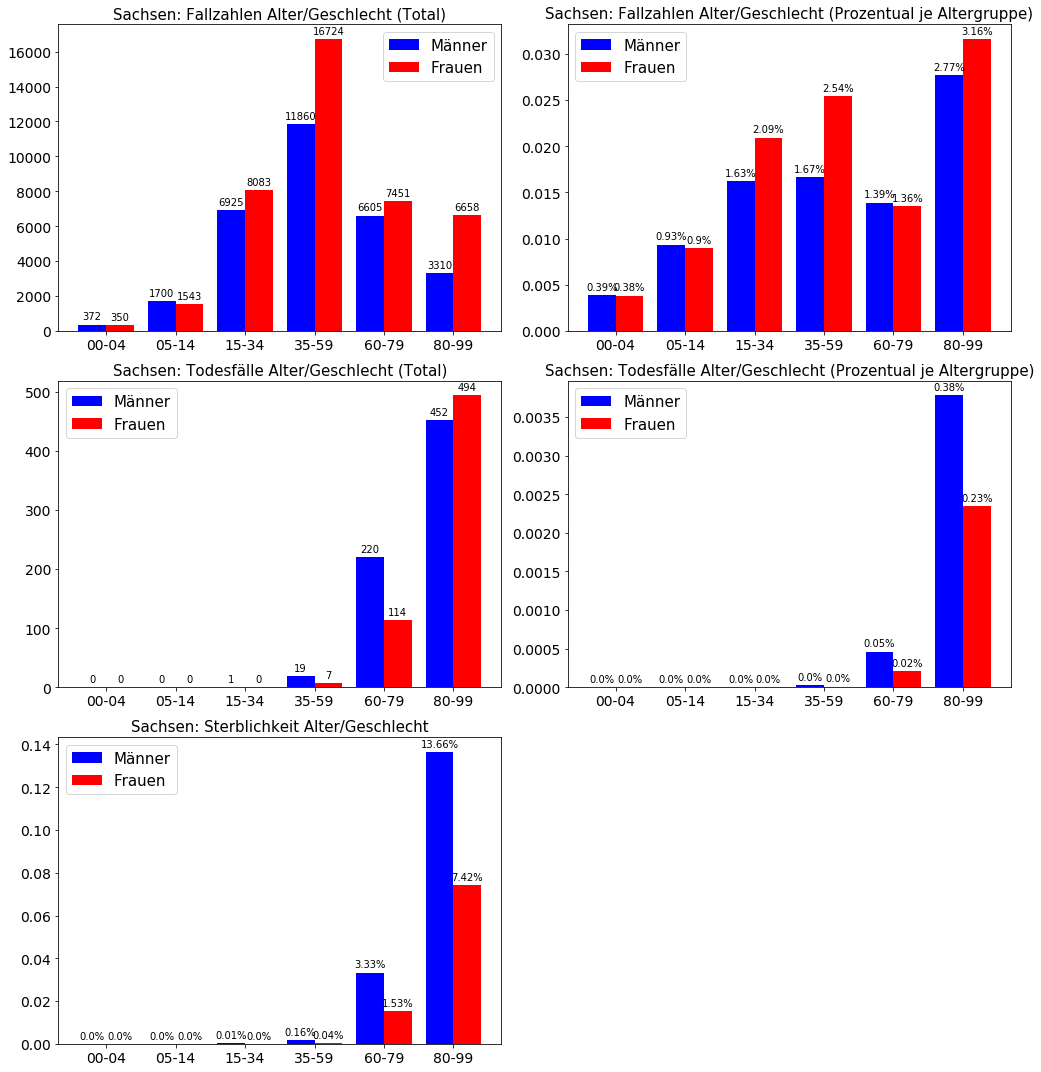

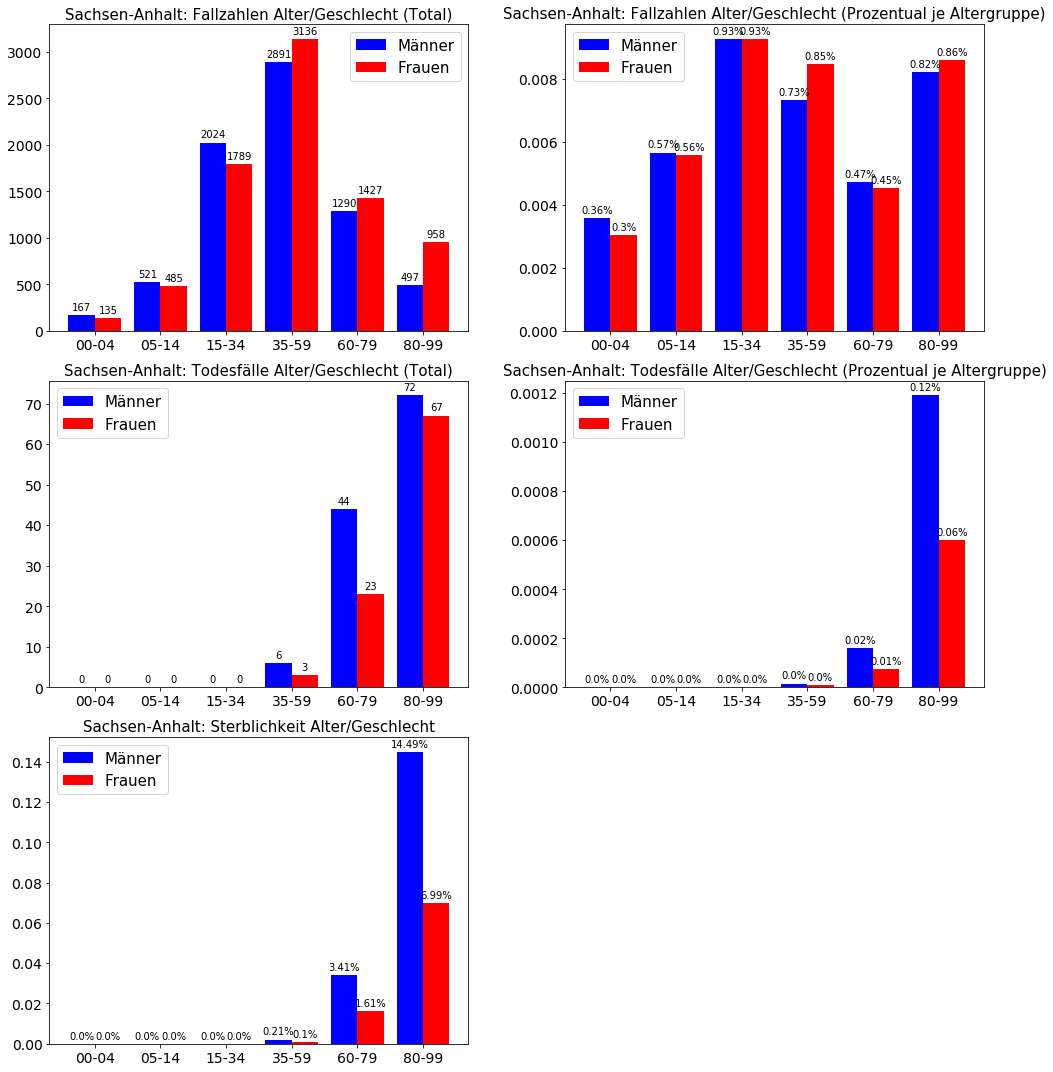

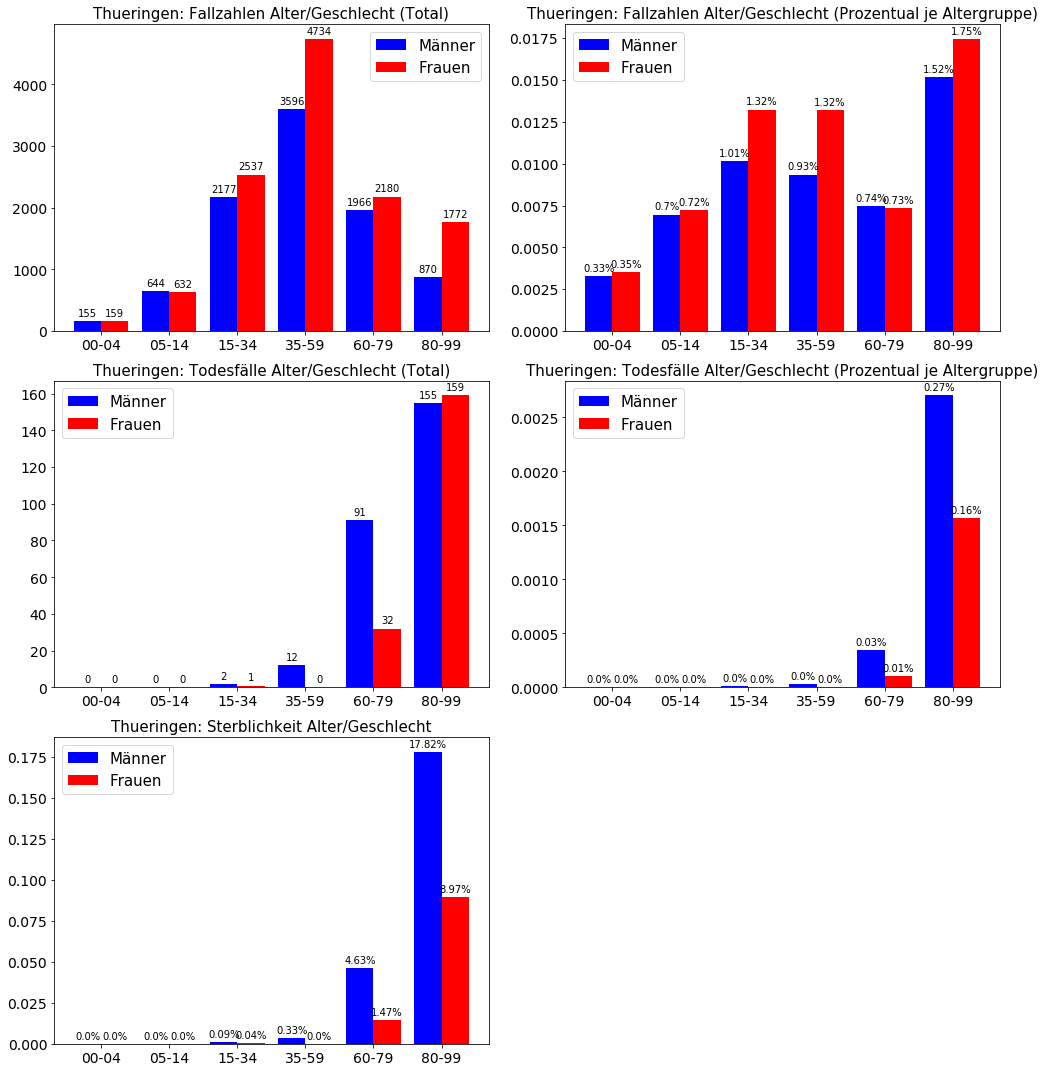

In [260]:
color1 = 'blue'
color2 = 'red'
legend_fontsize = 15
title_fontsize = 15
tick_fontsize = 14

for s in states[:-1]:
    if (s=="Baden-Württemberg"):
        s = "Baden-Wuerttemberg"
    if(s=="Thüringen"):
        s = "Thueringen"
    t = df_old[df_old.state==s][['gender', 'age_group', 'cases', 'deaths']].groupby(['gender', 'age_group']).sum()
    t = t.reset_index()

    x = np.arange(6)
    ages = t.age_group.unique()
    width=0.4

    fig = plt.figure(figsize=(15, 15))
    gs = gridspec.GridSpec(3, 2, figure=fig)

    ax = fig.add_subplot(gs[0, 0])
    rect1_0 = ax.bar(x - width/2, t[t.gender=="M"].cases, width, label='Männer', color=color1)
    rect2_0 = ax.bar(x + width/2, t[t.gender=="F"].cases, width, label='Frauen', color=color2)
    ax.set_title(s + ": Fallzahlen Alter/Geschlecht (Total)", fontsize=title_fontsize)
    ax.set_xticks(x)
    ax.set_xticklabels(ages)
    ax.legend(fontsize=legend_fontsize)
    ax.tick_params(axis='x', labelsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    autolabel(rect1_0,multiplier=1,suffix='')
    autolabel(rect2_0,multiplier=1,suffix='')
    
    ax = fig.add_subplot(gs[0, 1])
    rects1 = ax.bar(x - width/2, np.array(t[t.gender=="M"].cases) / 
                np.array(demographics[(demographics.state==s) & (demographics.gender=="male")].population), width, label='Männer', color=color1)
    rects2 = ax.bar(x + width/2, np.array(t[t.gender=="F"].cases) / 
                np.array(demographics[(demographics.state==s) & (demographics.gender=="female")].population), width, label='Frauen', color=color2)
    ax.set_title(s + ": Fallzahlen Alter/Geschlecht (Prozentual je Altergruppe)", fontsize=title_fontsize)
    ax.set_xticks(x)
    ax.set_xticklabels(ages)
    ax.legend(fontsize=legend_fontsize)
    ax.tick_params(axis='x', labelsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    autolabel(rects1)
    autolabel(rects2)

    ax = fig.add_subplot(gs[1, 0])
    rect3_0 = ax.bar(x - width/2, t[t.gender=="M"].deaths, width, label='Männer', color=color1)
    rect4_0 = ax.bar(x + width/2, t[t.gender=="F"].deaths, width, label='Frauen', color=color2)
    ax.set_title(s + ": Todesfälle Alter/Geschlecht (Total)", fontsize=title_fontsize)
    ax.set_xticks(x)
    ax.set_xticklabels(ages)
    ax.legend(fontsize=legend_fontsize)
    ax.tick_params(axis='x', labelsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    autolabel(rect3_0,multiplier=1,suffix='')
    autolabel(rect4_0,multiplier=1,suffix='')

    ax = fig.add_subplot(gs[1, 1])
    rects3 = ax.bar(x - width/2, np.array(t[t.gender=="M"].deaths) / 
                np.array(demographics[(demographics.state==s) & (demographics.gender=="male")].population), width, label='Männer', color=color1)
    rects4 = ax.bar(x + width/2, np.array(t[t.gender=="F"].deaths) / 
                np.array(demographics[(demographics.state==s) & (demographics.gender=="female")].population), width, label='Frauen', color=color2)
    ax.set_title(s + ": Todesfälle Alter/Geschlecht (Prozentual je Altergruppe)", fontsize=title_fontsize)
    ax.set_xticks(x)
    ax.set_xticklabels(ages)
    ax.legend(fontsize=legend_fontsize)
    ax.tick_params(axis='x', labelsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    autolabel(rects3)
    autolabel(rects4)

    ax = fig.add_subplot(gs[2, 0])
    rects5 = ax.bar(x - width/2, np.array(t[t.gender=="M"].deaths) / np.array(t[t.gender=="M"].cases), width, label='Männer', color=color1)
    rects6 = ax.bar(x + width/2, np.array(t[t.gender=="F"].deaths) / np.array(t[t.gender=="F"].cases), width, label='Frauen', color=color2)
    ax.set_title(s + ": Sterblichkeit Alter/Geschlecht", fontsize=title_fontsize)
    ax.set_xticks(x)
    ax.set_xticklabels(ages)
    ax.legend(fontsize=legend_fontsize)
    ax.tick_params(axis='x', labelsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    autolabel(rects5)
    autolabel(rects6)

    plt.tight_layout()  
    plt.show()

# Export PDF

In [261]:
!jupyter nbconvert --to html --no-input covid-19-in-germany.ipynb --output index.html

[NbConvertApp] Converting notebook covid-19-in-germany.ipynb to html
[NbConvertApp] Writing 6315026 bytes to index.html
